In [1]:
# loading data and removing redundancies in patients
all_ALL = read.csv("All Patient Data.csv",stringsAsFactors = TRUE)
head(all_ALL)
all_ALL = all_ALL[!duplicated(all_ALL$TARGET.USI),]
summary(all_ALL)

TARGET.USI,Gender,Race,Ethnicity,Age.at.Diagnosis.in.Days,First.Event,Event.Free.Survival.Time.in.Days,Vital.Status,Overall.Survival.Time.in.Days,Year.of.Diagnosis,...,BMA.Blasts.Day.43,Karyotype,Down.Syndrome,DNA.Index,Alternate.Therapy,Alternate.Therapy.Other,Cell.of.Origin,ALL.Molecular.Subtype,ALL.Gene.Expression.Subtype,Comment
TARGET-10-PANSHK,Male,White,Not Hispanic or Latino,837,Relapse,1354,Dead,2447,2005,...,NA,"46,XY,t(2;12)(p15;p12),del(7)(p11.2p22),der(12)inv(12)(p13q15)add(12)(q24)[3]/47,idem,+10[15]/48,idem,+10,+21[2]/46,XY[1]",No,1.000,CHEMOTHERAPY; Transplant,,B-Precursor,,NA,
TARGET-10-PANSIZ,Male,White,Not Hispanic or Latino,1652,None,3612,Alive,3612,2005,...,NA,,No,1.174,,,B-Precursor,,NA,
TARGET-10-PANSTA,Female,White,Not Hispanic or Latino,884,None,3821,Alive,3821,2005,...,NA,"46,XX,-1,-13,der(14)t(1;14)(p22;q32.1),+der(?)(?;1)(?;q25),+mar[14]/46,XX[6]",No,1.000,,,B-Precursor,,NA,
TARGET-10-PANSYA,Female,Black or African American,Not Hispanic or Latino,1443,None,3680,Alive,3680,2005,...,NA,,No,1.000,,,B-Precursor,,NA,
TARGET-10-PANTBB,Male,Unknown,Unknown,1104,None,3668,Alive,3668,2005,...,NA,"46,XY,add(19)(p13)[6]/46,XY[19]",No,1.109,,,B-Precursor,,NA,
TARGET-10-PANTCR,Male,White,Unknown,2059,None,2403,Unknown,2403,2005,...,NA,"45-48,add(12)(p13.1),add(14)(q22),-15,-20,+21,+1-2mar[cp12]/46,XY[8]",No,1.000,CHEMOTHERAPY,,B-Precursor,,NA,


            TARGET.USI      Gender    
 TARGET-10-PAIXDK:   1   Female: 718  
 TARGET-10-PAIXFI:   1   Male  :1065  
 TARGET-10-PAIXFN:   1                
 TARGET-10-PAIXGP:   1                
 TARGET-10-PAIXPH:   1                
 TARGET-10-PAIXPN:   1                
 (Other)         :1777                
                                        Race                       Ethnicity   
 American Indian or Alaska Native         :   9   Hispanic or Latino    : 326  
 Asian                                    :  76   Not Hispanic or Latino:1277  
 Black or African American                : 126   Unknown               : 180  
 Native Hawaiian or other Pacific Islander:   9                                
 Unknown                                  : 225                                
 White                                    :1338                                
                                                                               
 Age.at.Diagnosis.in.Days            First.Event

Warning message:
"package 'ggpubr' was built under R version 3.6.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"

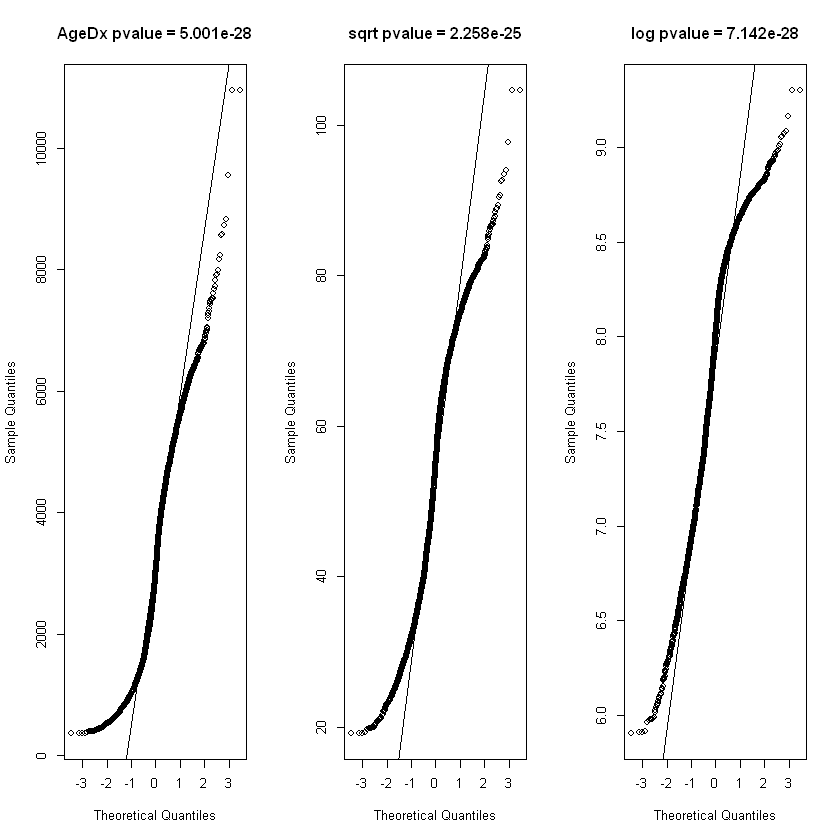

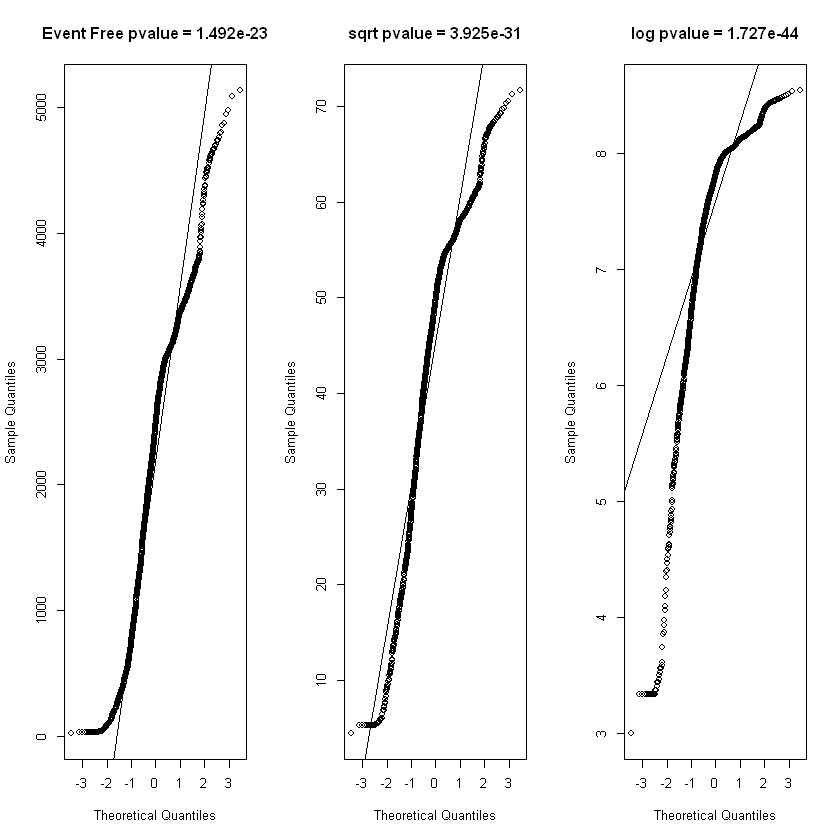

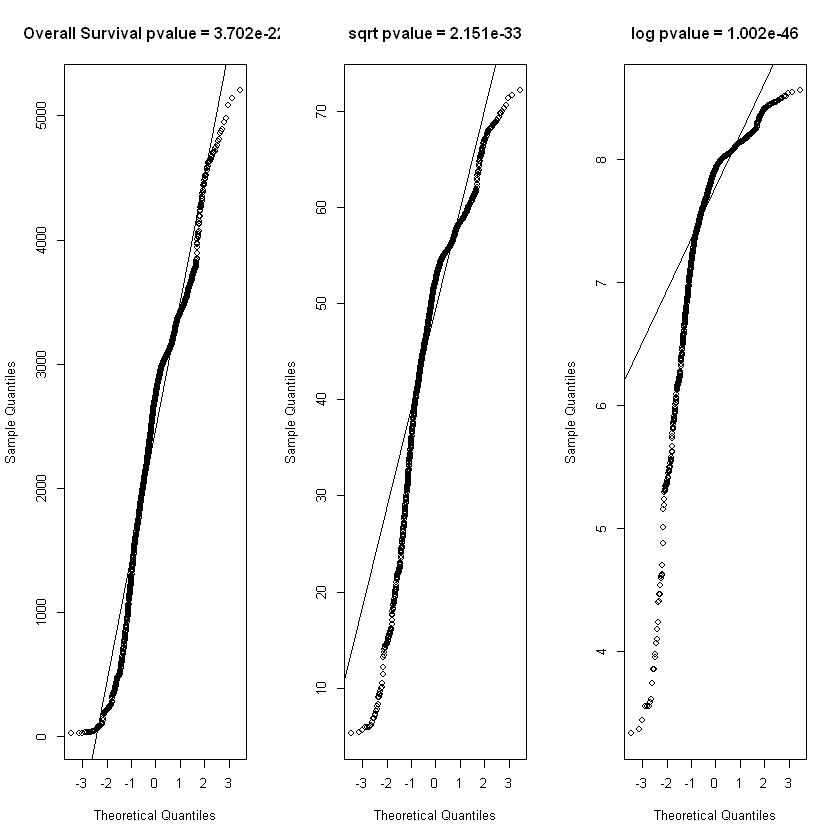

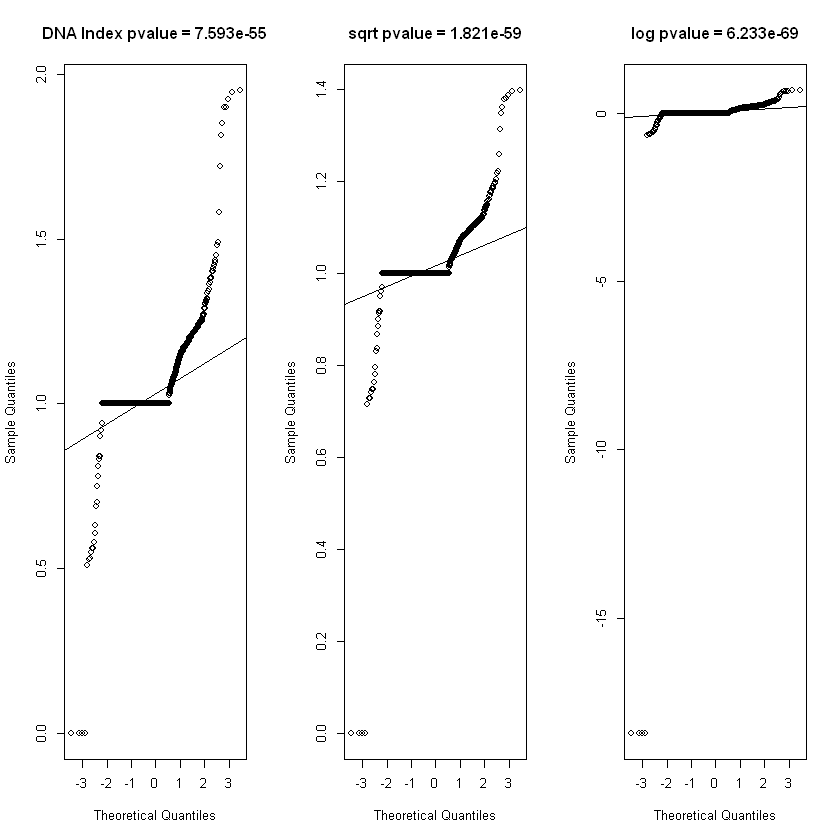

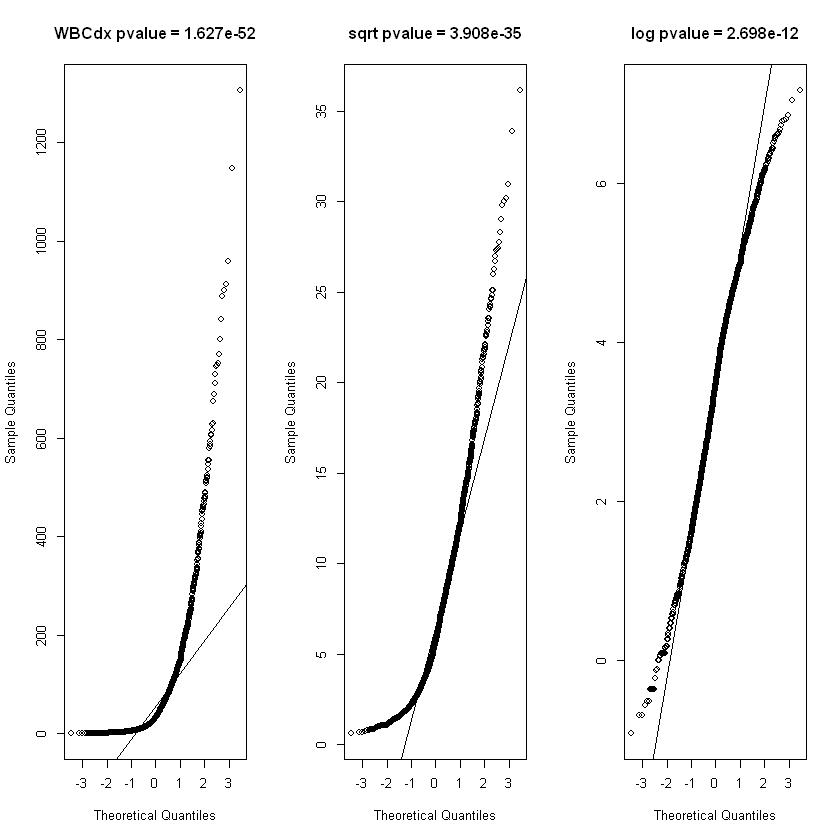

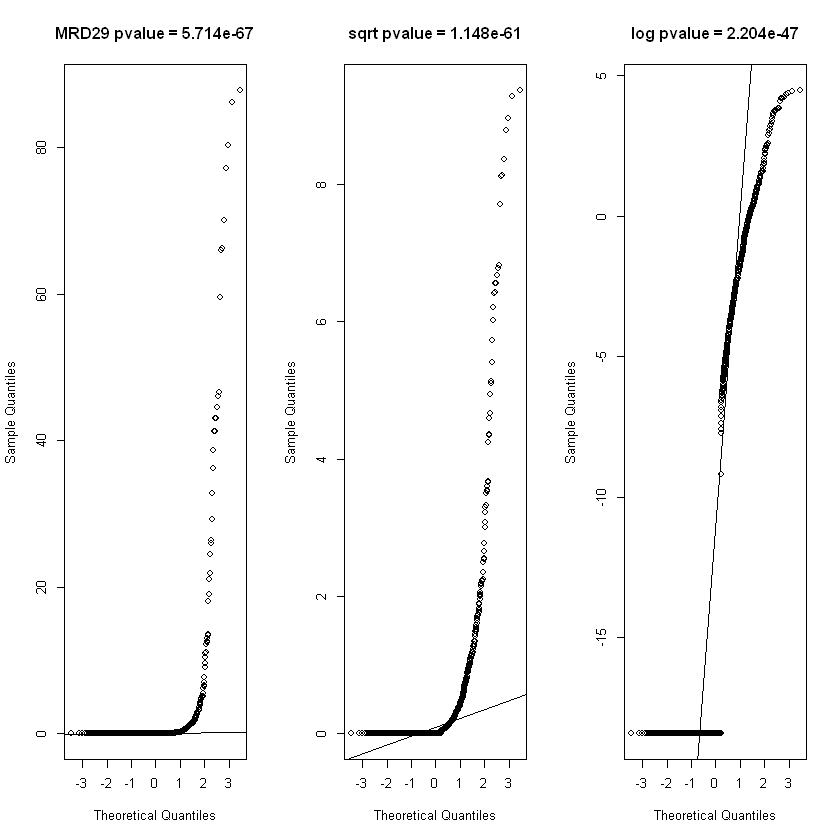

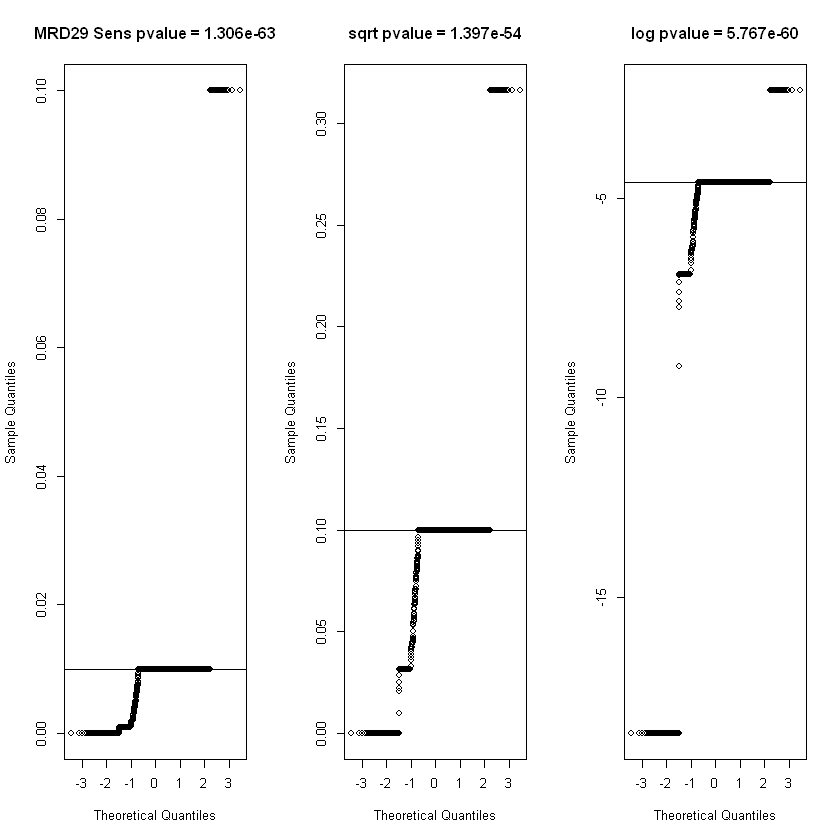

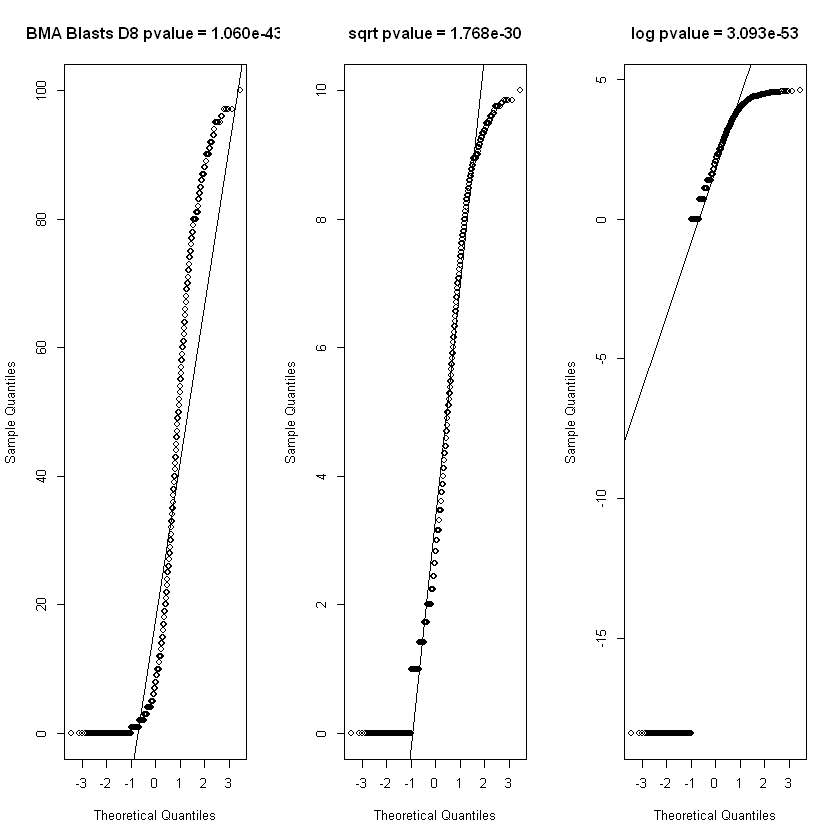

,Mean,Median,Std. Dev.,Range,Max,Min
Age.at.Diagnosis.in.Days,3260.645541223,3021.00,2036.79028456,10579.00,10946.00,367.0
Event.Free.Survival.Time.in.Days,2227.101514302,2471.00,1165.66144684,5117.00,5137.00,20.0
Overall.Survival.Time.in.Days,2464.025799215,2737.00,1062.37586713,5176.00,5204.00,28.0
DNA.Index,1.042083878,1.00,0.11853329,1.95,1.95,0.0
WBC.at.Diagnosis,81.075787998,32.30,127.33542764,1305.60,1306.00,0.4
MRD.Day.29,0.967167111,0.00,6.20093354,87.80,87.80,0.0
MRD.Day.29.Sensitivity.,0.009184357,0.01,0.01090817,0.10,0.10,0.0
BMA.Blasts.Day.8,21.209195402,8.00,26.69330263,100.00,100.00,0.0
BMA.Blasts.Day.29,1.418552036,0.00,6.04071601,89.00,89.00,0.0


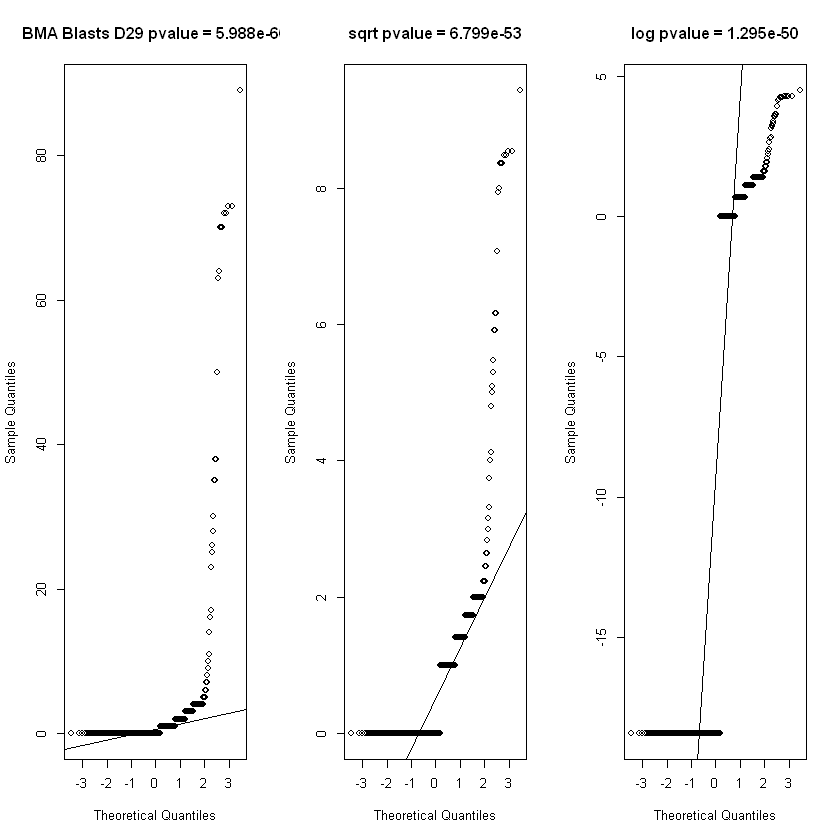

In [2]:
library("ggpubr")
options(scipen = 6)
# descriptive statistics of continous variables
cont_var = c("Age.at.Diagnosis.in.Days","Event.Free.Survival.Time.in.Days","Overall.Survival.Time.in.Days","DNA.Index",
             "WBC.at.Diagnosis","MRD.Day.29","MRD.Day.29.Sensitivity.","BMA.Blasts.Day.8","BMA.Blasts.Day.29")
good_var = c("AgeDx","Event Free","Overall Survival","DNA Index","WBCdx","MRD29","MRD29 Sens","BMA Blasts D8",
            "BMA Blasts D29")
cont_stats = data.frame(matrix(0,nrow=length(cont_var),ncol= 6))
rownames(cont_stats) = cont_var
colnames(cont_stats) = c("Mean","Median","Std. Dev.","Range","Max","Min")
k = 1
for(var in cont_var){
    cont_stats[var,"Mean"] = mean(unlist(all_ALL[var]),na.rm = TRUE)
    cont_stats[var,"Median"] = median(unlist(all_ALL[var]),na.rm = TRUE)
    cont_stats[var,"Std. Dev."] = sd(unlist(all_ALL[var]),na.rm = TRUE)
    cont_stats[var,"Range"] = max(unlist(all_ALL[var]),na.rm = TRUE) - min(unlist(all_ALL[var]),na.rm = TRUE)
    cont_stats[var,"Max"] = max(unlist(all_ALL[var]),na.rm = TRUE)
    cont_stats[var,"Min"] = min(unlist(all_ALL[var]),na.rm = TRUE)
    shap_p = shapiro.test(unlist(all_ALL[var]))$p.value
    shap_p_sqrt = shapiro.test(sqrt(unlist(all_ALL[var])))$p.value
    shap_p_log = shapiro.test(log(unlist(all_ALL[var]+0.00000001)))$p.value
    shap_test = sprintf("%s pvalue = %1.3e",good_var[k],shap_p)
    shap_test_sqrt = sprintf("sqrt pvalue = %1.3e",shap_p_sqrt)
    shap_test_log = sprintf("log pvalue = %1.3e",shap_p_log)
    par(mfrow=c(1,3))
    qqnorm(unlist(all_ALL[var]),main = shap_test)
    qqline(unlist(all_ALL[var]))
    qqnorm(sqrt(unlist(all_ALL[var])),main = shap_test_sqrt)
    qqline(sqrt(unlist(all_ALL[var])))
    qqnorm(log(unlist(all_ALL[var]+0.00000001)),main = shap_test_log)
    qqline(log(unlist(all_ALL[var]+0.00000001)))
#     plot(density(unlist(all_ALL[var]),na.rm = TRUE),main = shap_test)
#     plot(density(sqrt(unlist(all_ALL[var])),na.rm = TRUE),main = shap_test_sqrt)
#     plot(density(log(unlist(all_ALL[var])),na.rm = TRUE),main = shap_test_log)
    k = k+1
}
cont_stats


Because of the high sample size (1700+) the central limit theorem says we can still use parameteric tests even though these do not have normal looking distributions.

In [3]:
# Evaluating probabilites/percentages of categorical variables
# head(all_ALL)
cat_var = c("Gender","Race","Ethnicity","First.Event","Vital.Status","Down.Syndrome","Cell.of.Origin",
            "Bone.Marrow.Site.of.Relapse","CNS.Site.of.Relapse","Testes.Site.of.Relapse","Other.Site.of.Relapse",
           "ETV6.RUNX1.Fusion.Status")
cat_data = all_ALL[cat_var]
beta = cat_data$Cell.of.Origin == "B precursor"
cat_data$Cell.of.Origin[beta] = "B-Precursor"
# head(cat_data)
# summary(cat_data)
cat_props_perc = list()
cat_props_total =list()
k=0
for(var in cat_var){
    k = k+1
    t = table(cat_data[var])/length(cat_data$Gender)
    t2 = table(cat_data[var])
    cat_props_perc[var] = list(t)
    cat_props_total[var] = list(t2)
}
cat_props_perc
cat_props_total


$Gender

   Female      Male 
0.4026921 0.5973079 

$Race

         American Indian or Alaska Native 
                              0.005047672 
                                    Asian 
                              0.042624790 
                Black or African American 
                              0.070667414 
Native Hawaiian or other Pacific Islander 
                              0.005047672 
                                  Unknown 
                              0.126191812 
                                    White 
                              0.750420639 

$Ethnicity

    Hispanic or Latino Not Hispanic or Latino                Unknown 
             0.1828379              0.7162086              0.1009534 

$First.Event

               Censored                   Death Death without Remission 
           0.0925406618            0.0229949523            0.0005608525 
      Induction failure                    None             Progression 
           0.0100953449            0.6

$Gender

Female   Male 
   718   1065 

$Race

         American Indian or Alaska Native 
                                        9 
                                    Asian 
                                       76 
                Black or African American 
                                      126 
Native Hawaiian or other Pacific Islander 
                                        9 
                                  Unknown 
                                      225 
                                    White 
                                     1338 

$Ethnicity

    Hispanic or Latino Not Hispanic or Latino                Unknown 
                   326                   1277                    180 

$First.Event

               Censored                   Death Death without Remission 
                    165                      41                       1 
      Induction failure                    None             Progression 
                     18                    1129   

In [4]:
# US population characteristics to compare to 
USage = matrix(c(0.06,0.223,0,0.165),nrow = 1,ncol = 4)
USage[3] = 1-sum(USage)
USage = data.frame(USage)
colnames(USage) = c("Under 5","5-18","18-65","Over 65")
USrace = matrix(c(0.013,0.059,0.134,0.002,0.763),nrow = 1)
USrace = data.frame(USrace/sum(USrace))
colnames(USrace) = c("American Indian","Asian","Black","Pacific Islander","White")
USeth = data.frame(matrix(c(0.185,0.601)/(0.185+0.601),nrow = 1))
colnames(USeth) = c("Hispanic","Not-Hispanic")
USgender = data.frame(matrix(c(0.508,1-0.508),nrow=1))
colnames(USgender)=c("Male","Female")
USage
USrace
USeth
USgender

Under 5,5-18,18-65,Over 65
0.06,0.223,0.552,0.165


American Indian,Asian,Black,Pacific Islander,White
0.01338826,0.0607621,0.1380021,0.002059732,0.7857878


Hispanic,Not-Hispanic
0.235369,0.764631


Male,Female
0.508,0.492


[1] 5

[1] 1

Warning message in chisq.test(cat_props_total$Race[c(1, 2, 3, 4, 6)], p = USrace):
"Chi-squared approximation may be incorrect"


	Chi-squared test for given probabilities

data:  cat_props_total$Race[c(1, 2, 3, 4, 6)]
X-squared = 68.287, df = 4, p-value = 5.217e-14


American Indian or Alaska Native,Asian,Black or African American,Native Hawaiian or other Pacific Islander,White
20.85891,94.66735,215.0072,3.209063,1224.257



	Chi-squared test for given probabilities

data:  cat_props_total$Ethnicity[c(1, 3)]
X-squared = 470.09, df = 1, p-value < 2.2e-16



	Chi-squared test for given probabilities

data:  cat_props_total$Gender
X-squared = 79.112, df = 1, p-value < 2.2e-16


Warning message in chisq.test(unlist(adj_race), p = USrace):
"Chi-squared approximation may be incorrect"


	Chi-squared test for given probabilities

data:  unlist(adj_race)
X-squared = 76.427, df = 4, p-value = 9.944e-16


American Indian,Asian,Black,Pacific Islander,White
23.87127,108.3388,246.0577,3.672503,1401.06



	Chi-squared test for given probabilities

data:  unlist(ALL_cat_age)
X-squared = 4902.1, df = 3, p-value < 2.2e-16


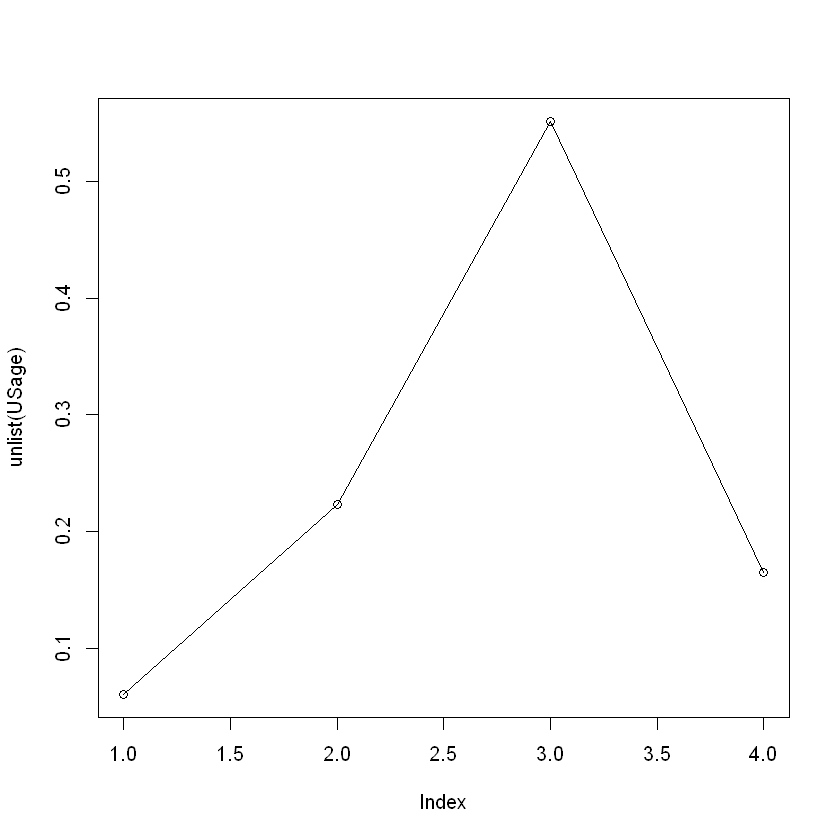

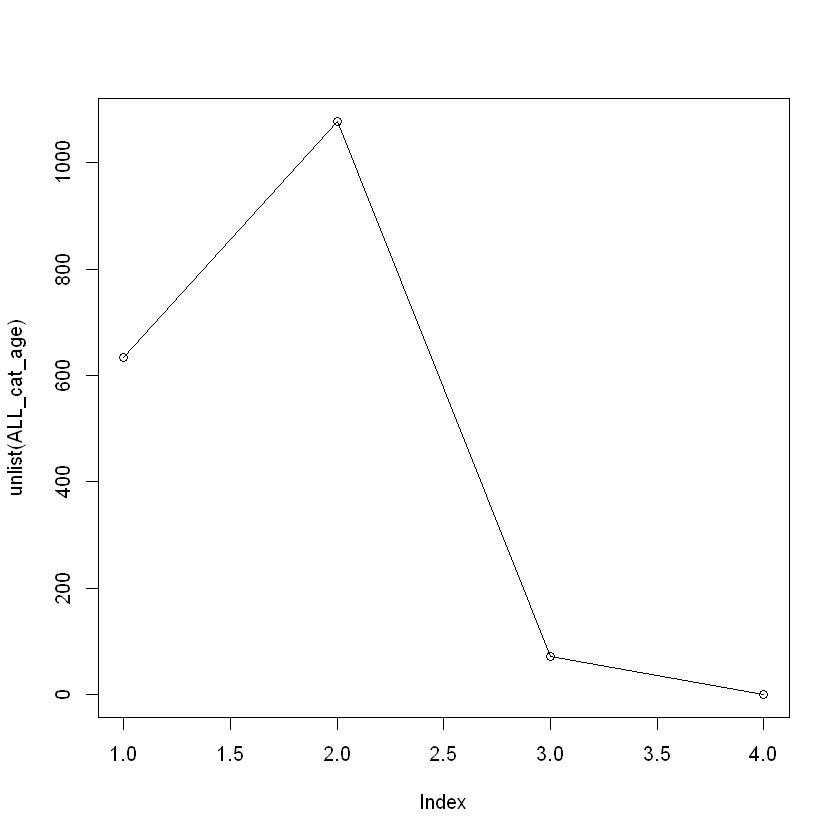

In [5]:
# Chi-square tests to determine if these population characteristics are different
length(cat_props_total$Race[c(1,2,3,4,6)])
sum(USrace)
Xrace = chisq.test(cat_props_total$Race[c(1,2,3,4,6)],p = USrace)
Xrace
Xrace$expected
Xeth = chisq.test(cat_props_total$Ethnicity[c(1,3)],p = USeth)
Xeth
Xgen = chisq.test(cat_props_total$Gender,p = USgender)
Xgen
# adjusting race so unknown is spread out by proportion of other races
ind = c(1,2,3,4,6)
adj_race = cat_props_perc$Race[ind]/sum(cat_props_perc$Race[ind])
adj_race = data.frame(matrix(round(adj_race*sum(cat_props_total$Race)),nrow=1))
adj_race[1,1] = adj_race[1,1]+1
t = table(adj_race)
colnames(adj_race) = c("American Indian","Asian","Black","Pacific Islander","White")
Xrace_adj = chisq.test(unlist(adj_race),p=USrace)
Xrace_adj
Xrace_adj$expected
# finding distribution of ages following that used in census
ALL_cat_age = c(sum(all_ALL$Age.at.Diagnosis.in.Days/365 <= 5),sum(all_ALL$Age.at.Diagnosis.in.Days/365 <=18)-
                sum(all_ALL$Age.at.Diagnosis.in.Days/365 <= 5),
                sum(all_ALL$Age.at.Diagnosis.in.Days/365 >= 18),sum(all_ALL$Age.at.Diagnosis.in.Days/365 > 65))
ALL_cat_age = data.frame(matrix(ALL_cat_age,nrow=1))
colnames(ALL_cat_age) = c("Under 5","5-18","18-65","Over 65")
Xage = chisq.test(unlist(ALL_cat_age),p = USage)
Xage
plot(unlist(USage),type = 'o')
plot(unlist(ALL_cat_age),type = 'o')

Chi-squared test shows that for these categorical descriptors of the patient population frequencies of Race, Ethnicity, Age, and Gender are unequally distributed compared to the US. 

In [6]:
# addressing relapse
bm_relapse = all_ALL$Bone.Marrow.Site.of.Relapse == "Yes"
cns_relapse = all_ALL$CNS.Site.of.Relapse == "Yes"
t_relapse = all_ALL$Testes.Site.of.Relapse == "Yes"
other_relapse = all_ALL$Other.Site.of.Relapse == "Yes"
relapse = matrix(0,nrow = length(bm_relapse),ncol=4)
relapse[,1] = bm_relapse
relapse[,2] = cns_relapse
relapse[,3] = t_relapse
relapse[,4] = other_relapse
relapse = rowSums(relapse)
all_ALL$Relapse = relapse >0


Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  3.1.1     v purrr   0.3.2
v tidyr   1.1.3     v dplyr   1.0.5
v readr   1.3.1     v stringr 1.4.0
v tibble  3.1.1     v forcats 0.4.0
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


package 'factoextra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jhend\AppData\Local\Temp\RtmpAPyEgc\downloaded_packages


Warning message:
"package 'factoextra' was built under R version 3.6.3"Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


package 'dendextend' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jhend\AppData\Local\Temp\RtmpAPyEgc\downloaded_packages


Warning message:
"package 'dendextend' was built under R version 3.6.3"
---------------------
Welcome to dendextend version 1.14.0
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------


Attaching package: 'dendextend'

The following object is masked from 'package:ggpubr':

    rotate

The following object is masked from 'package:stats':

    cutree



package 'psych' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jhend\AppData\Local\Temp\RtmpAPyEgc\downloaded_packages


Warning message:
"package 'psych' was built under R version 3.6.3"
Attaching package: 'psych'

The following objects are masked from 'package:ggplot2':

    %+%, alpha



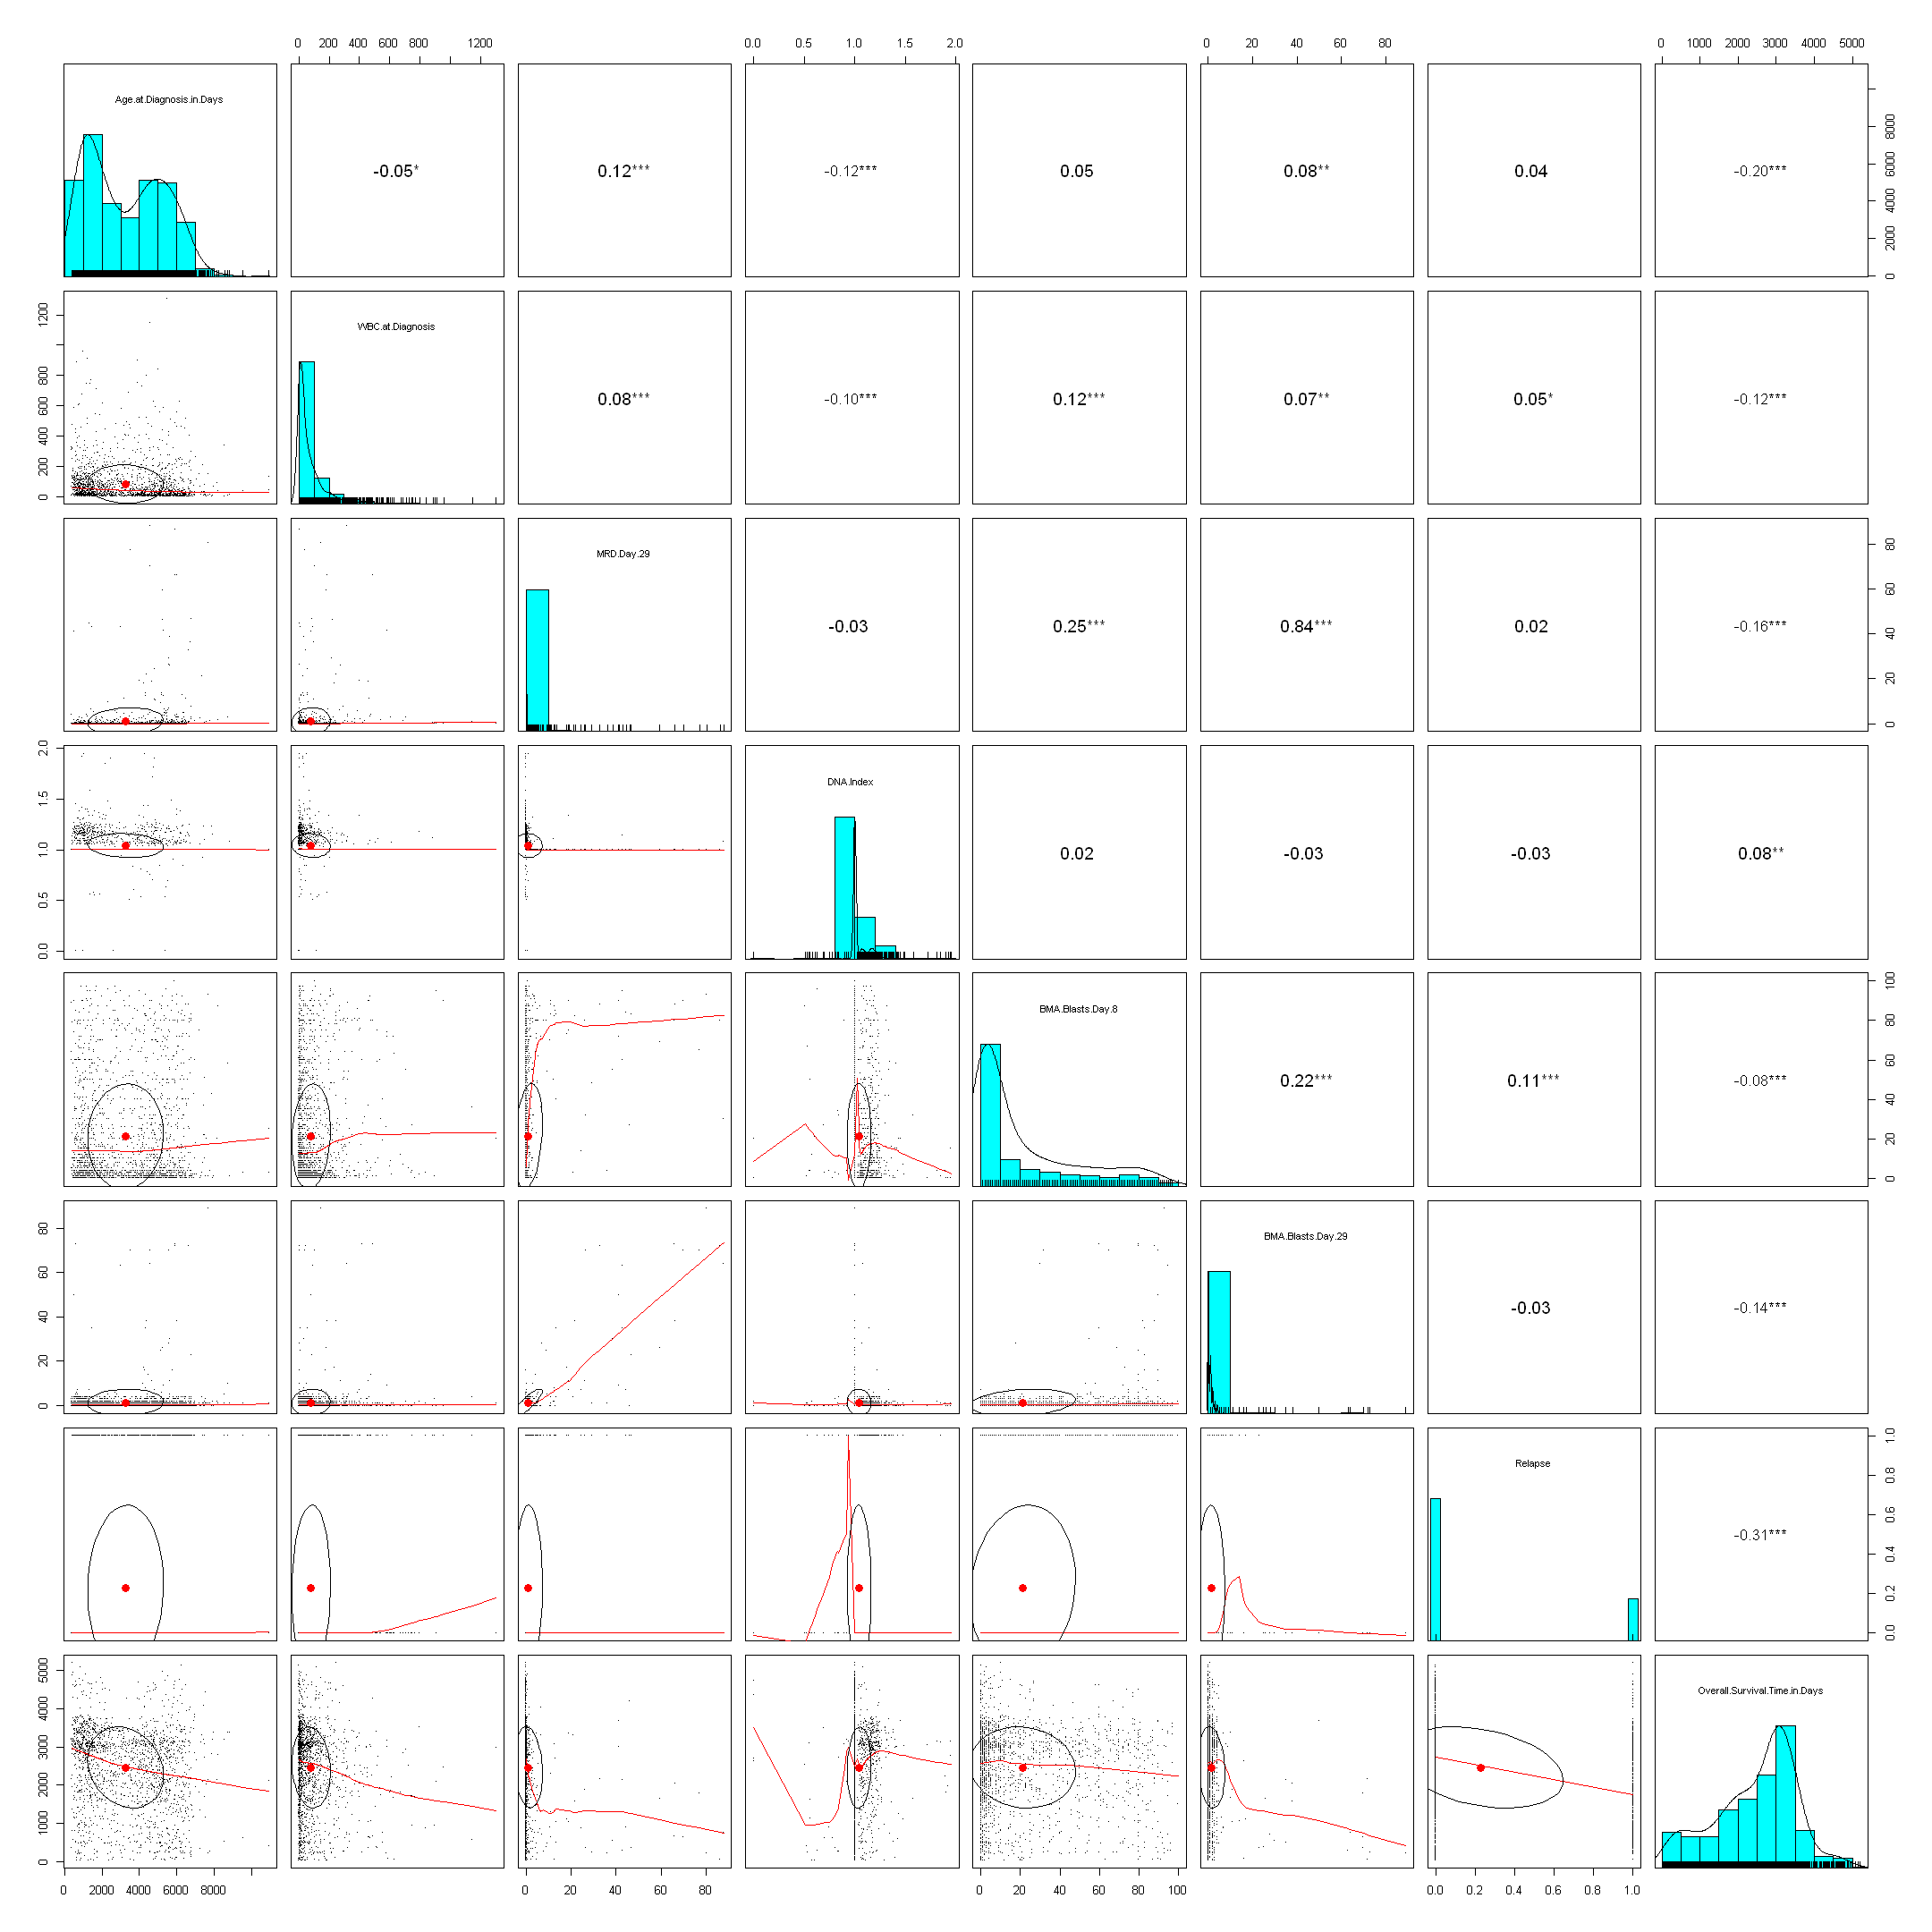

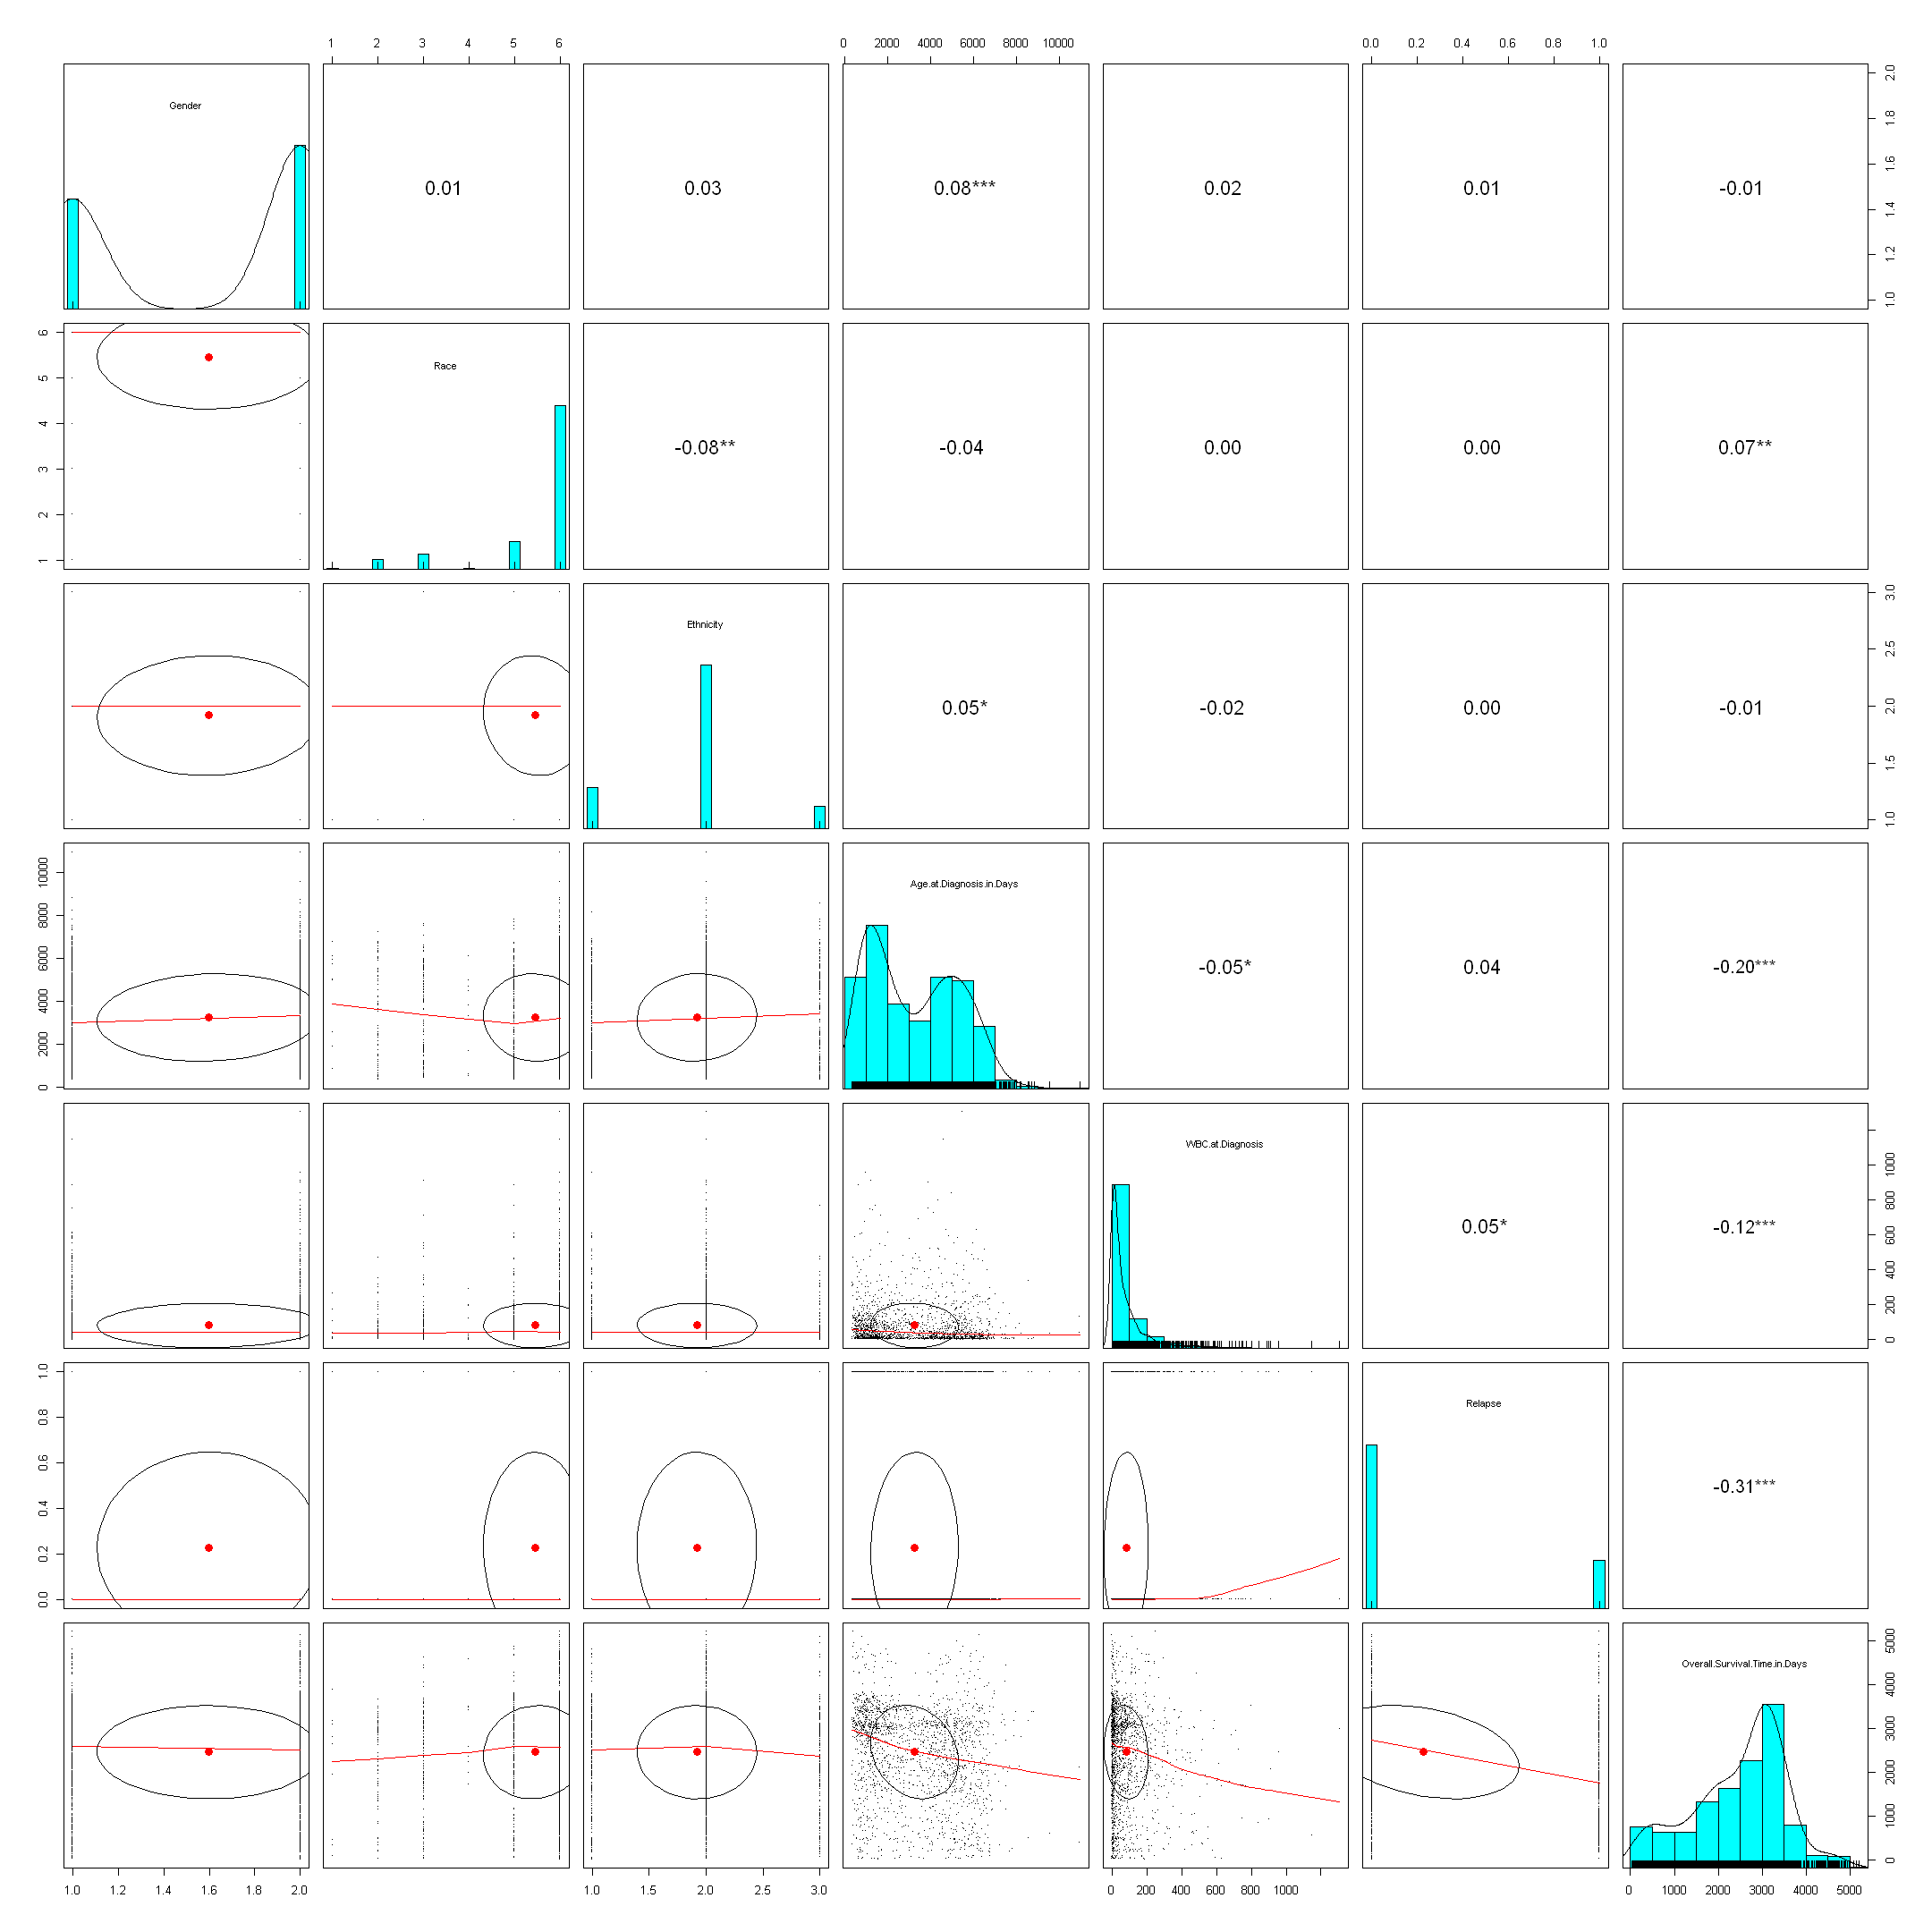

In [7]:
# Correlation between patient descriptors and severity indicators?
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
# install.packages("factoextra")
library(factoextra)
# install.packages("dendextend")
library(dendextend)
# install.packages("psych")
library(psych)

# pos_mrd = all_ALL$MRD.Day.29 >= all_ALL$MRD.Day.29.Sensitivity.
# na_mrd = is.na(all_ALL$MRD.Day.29.Sensitivity.) 
# placehold = all_ALL$MRD.Day.29
# placehold[pos_mrd] = "Positive"
# placehold[!pos_mrd] = "Negative"
# placehold[na_mrd] = "Unknown"
# all_ALL["MRD.Day.29"] = factor(placehold)

options(repr.plot.width = 18, repr.plot.height = 18)
pairs.panels(all_ALL[c("Age.at.Diagnosis.in.Days","WBC.at.Diagnosis","MRD.Day.29","DNA.Index",
                "BMA.Blasts.Day.8","BMA.Blasts.Day.29","Relapse","Overall.Survival.Time.in.Days")],pch='.',stars=TRUE)
pairs.panels(all_ALL[c("Gender","Race","Ethnicity","Age.at.Diagnosis.in.Days","WBC.at.Diagnosis","Relapse",
                       "Overall.Survival.Time.in.Days")],pch='.',stars=TRUE)

Loading required package: Matrix

Attaching package: 'Matrix'

The following objects are masked from 'package:tidyr':

    expand, pack, unpack

Loading required package: foreach

Attaching package: 'foreach'

The following objects are masked from 'package:purrr':

    accumulate, when

Loaded glmnet 2.0-16



[1] 1042456

[1] -274865065

[1] -274400551

[1] -274867169

[1] 1023929

[1] 1025852

`geom_smooth()` using formula 'y ~ x'


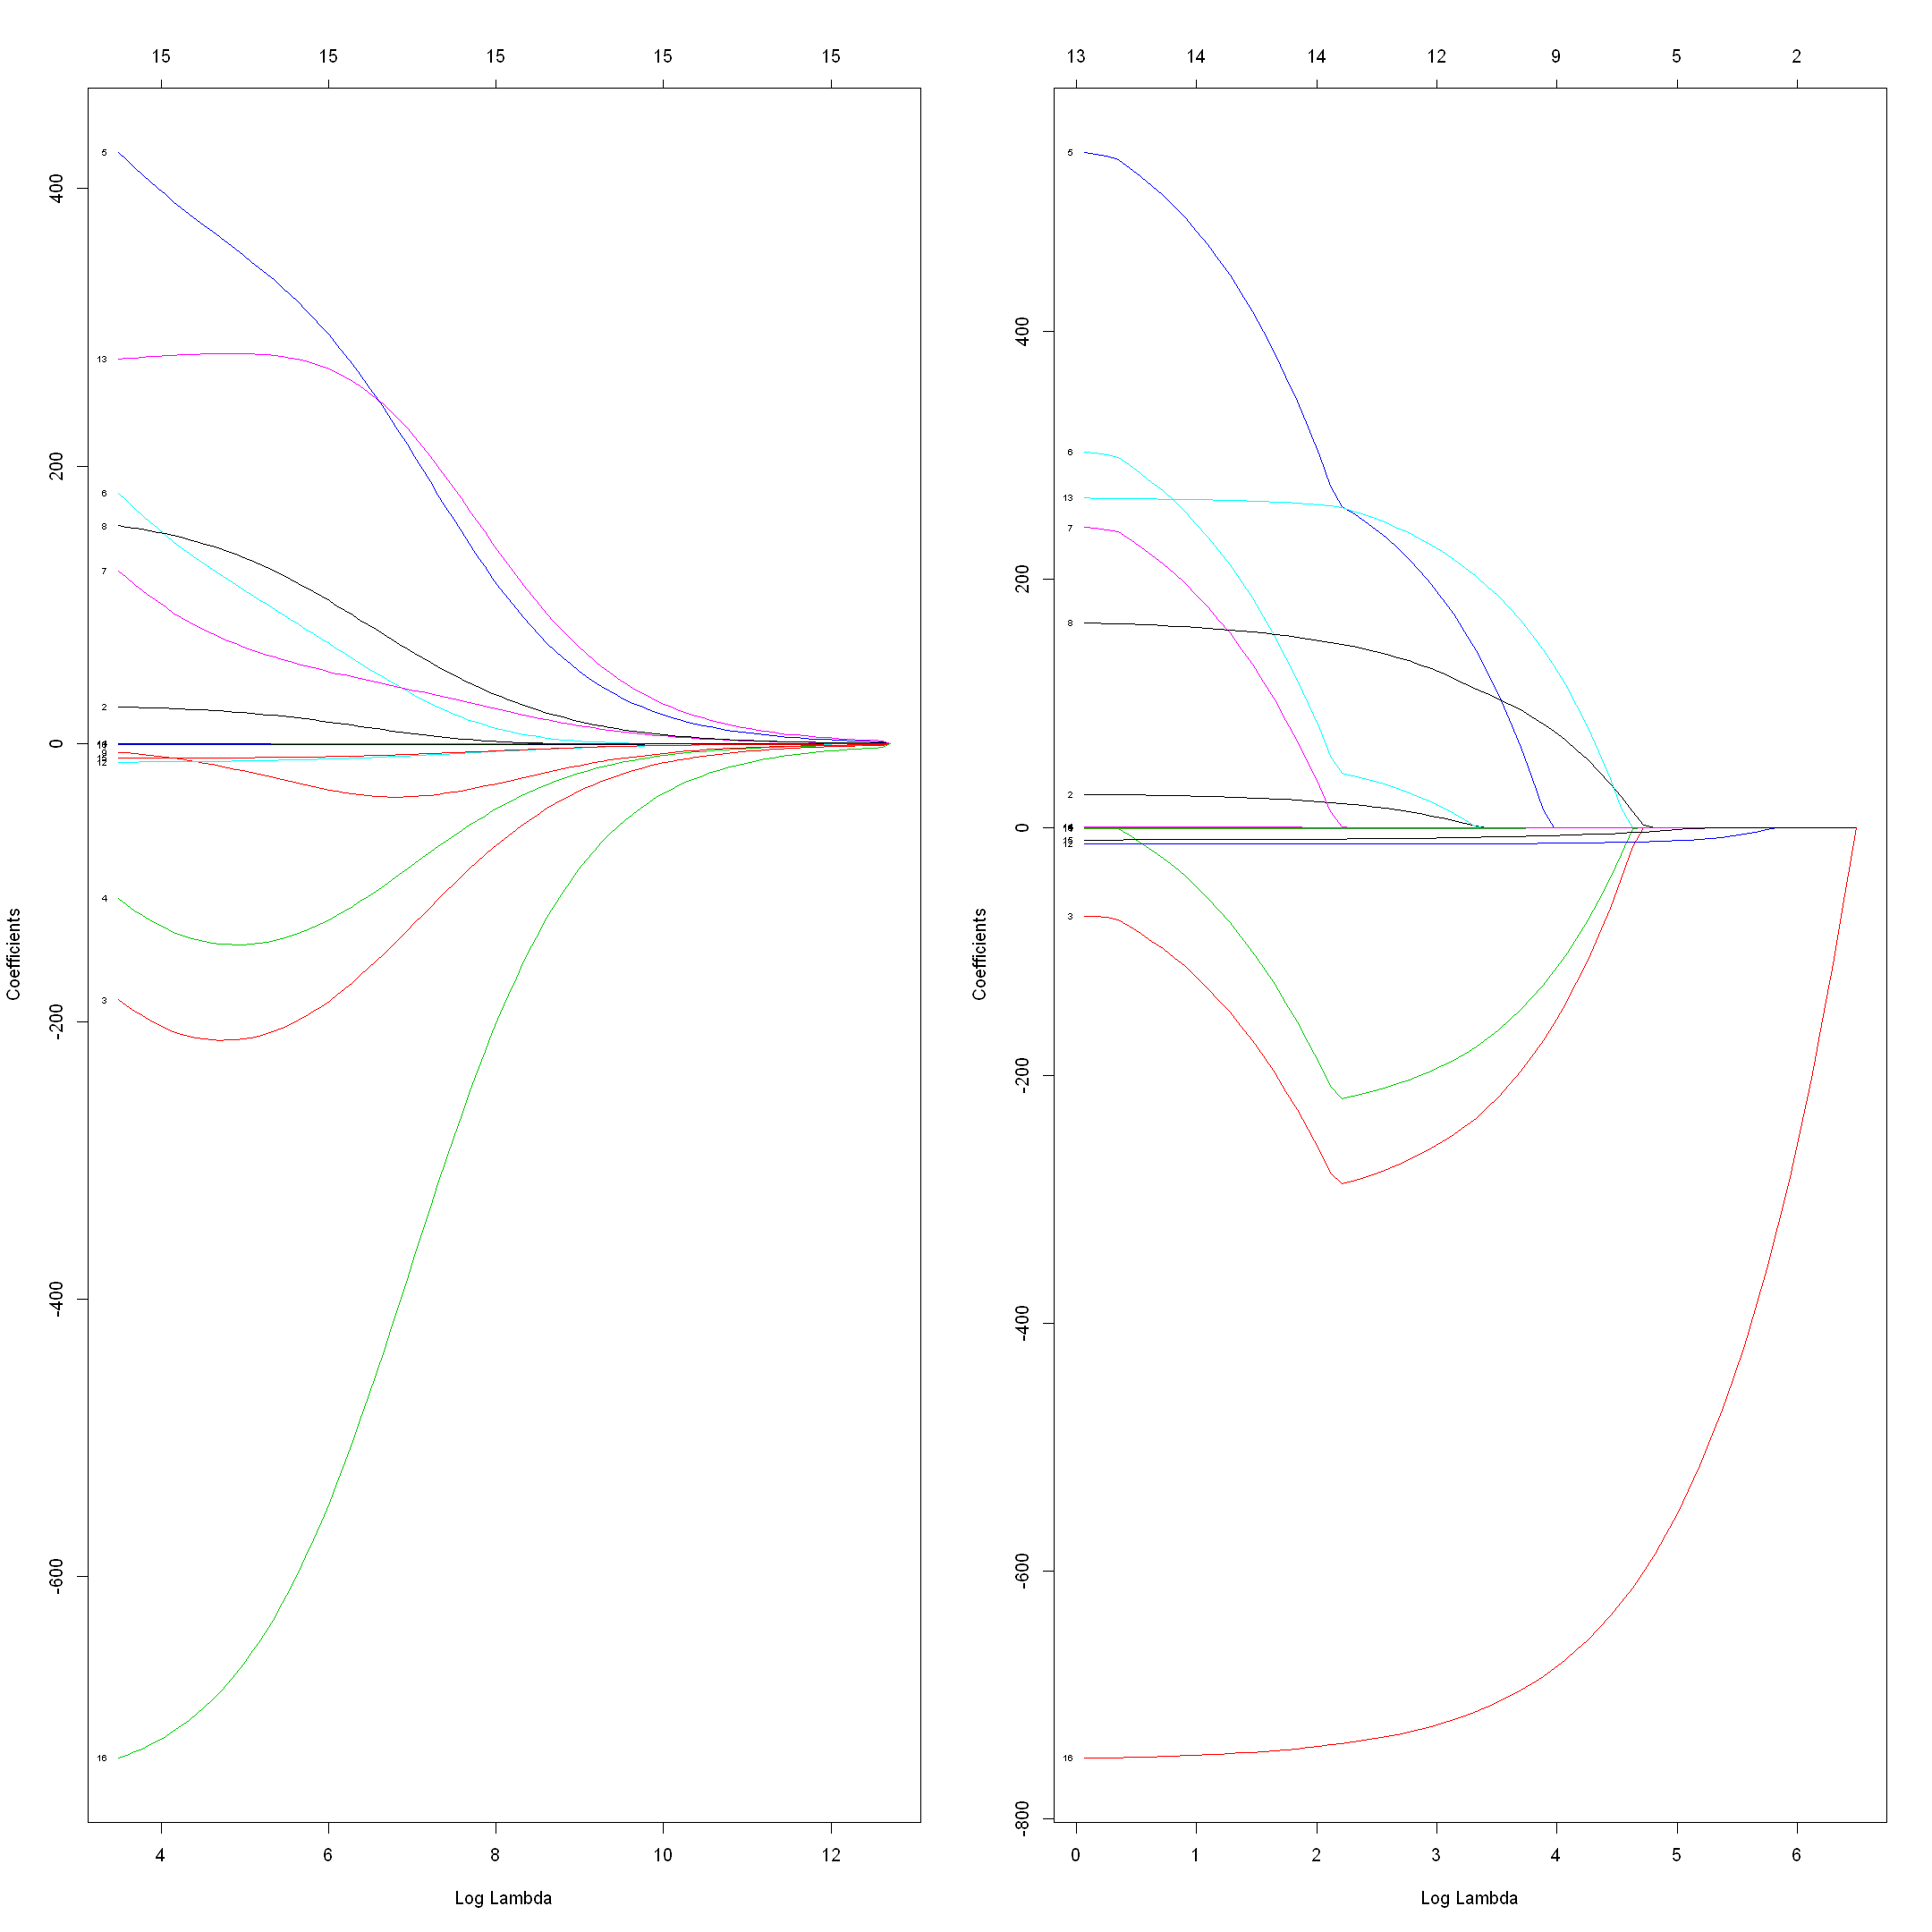

`geom_smooth()` using formula 'y ~ x'


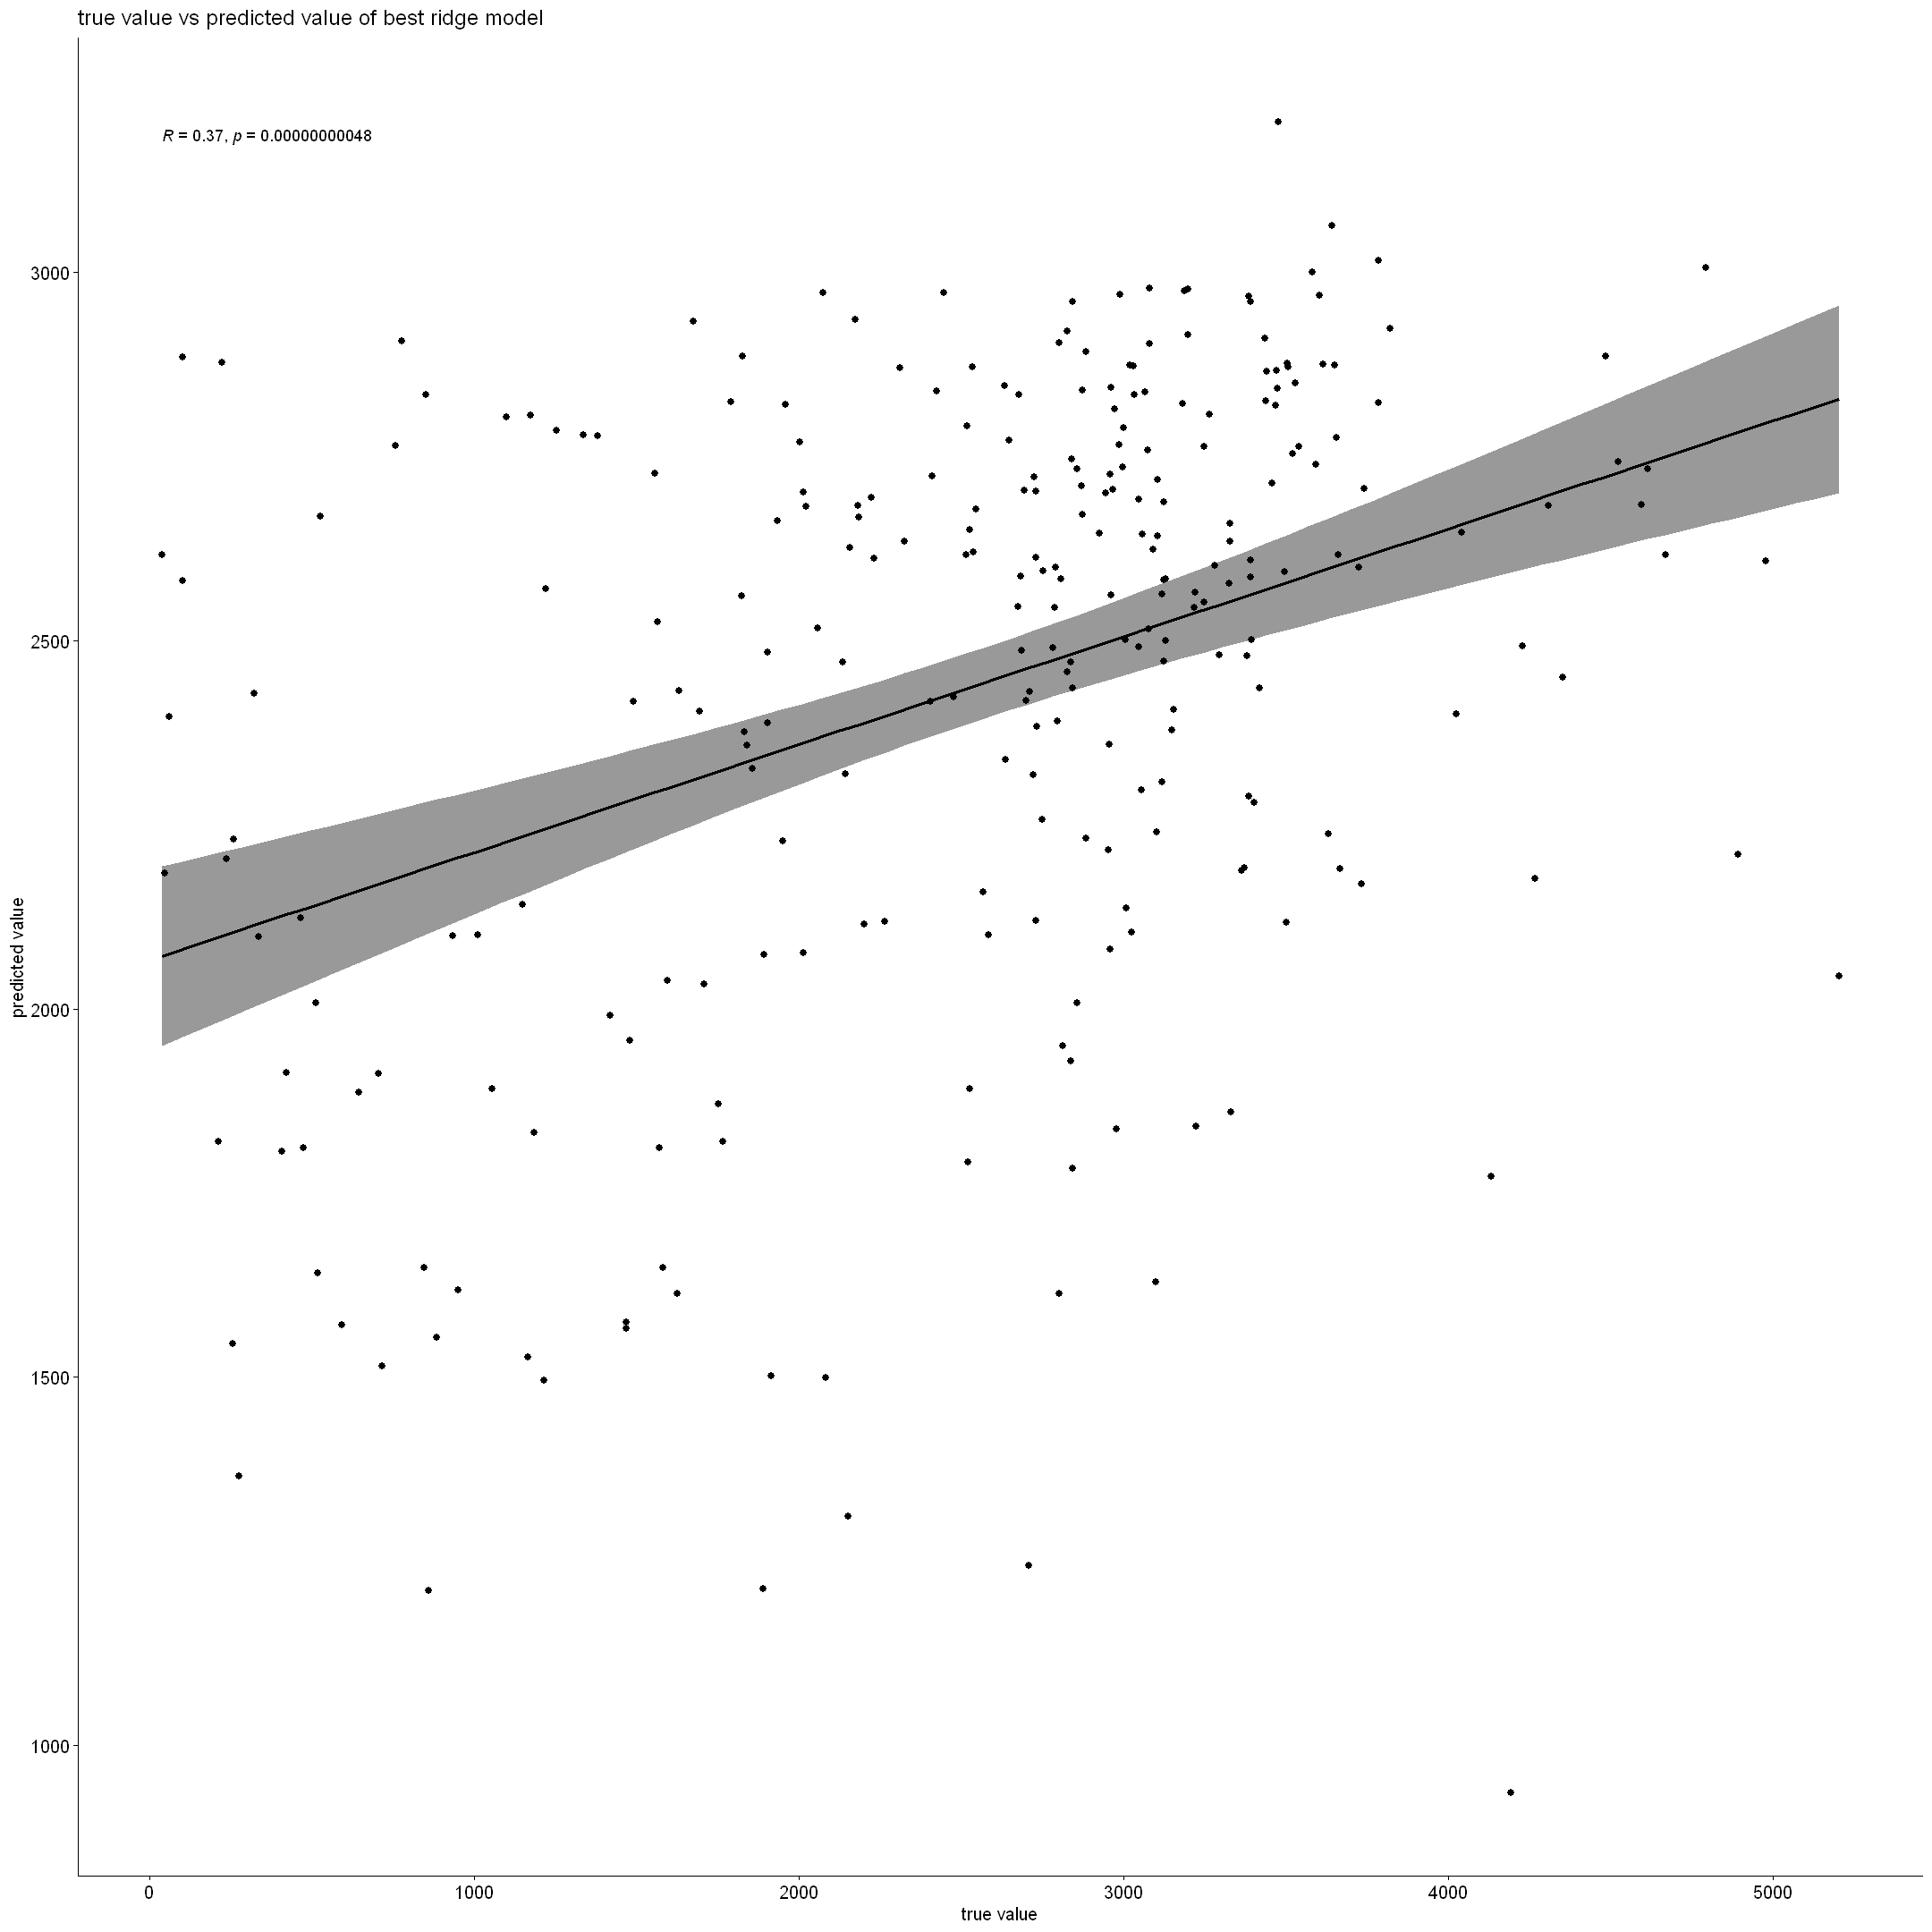

17 x 1 sparse Matrix of class "dgCMatrix"
                                                          1
(Intercept)                                   2360.55696810
(Intercept)                                      .         
GenderMale                                      26.74353929
RaceAsian                                      -71.47778073
RaceBlack or African American                    .         
RaceNative Hawaiian or other Pacific Islander  544.76853761
RaceUnknown                                    303.04601321
RaceWhite                                      241.84011706
EthnicityNot Hispanic or Latino                165.10583021
EthnicityUnknown                                 .         
Age.at.Diagnosis.in.Days                        -0.08519538
WBC.at.Diagnosis                                -0.82627712
MRD.Day.29                                     -13.48107773
DNA.Index                                      265.82633781
BMA.Blasts.Day.8                                 0.2264654

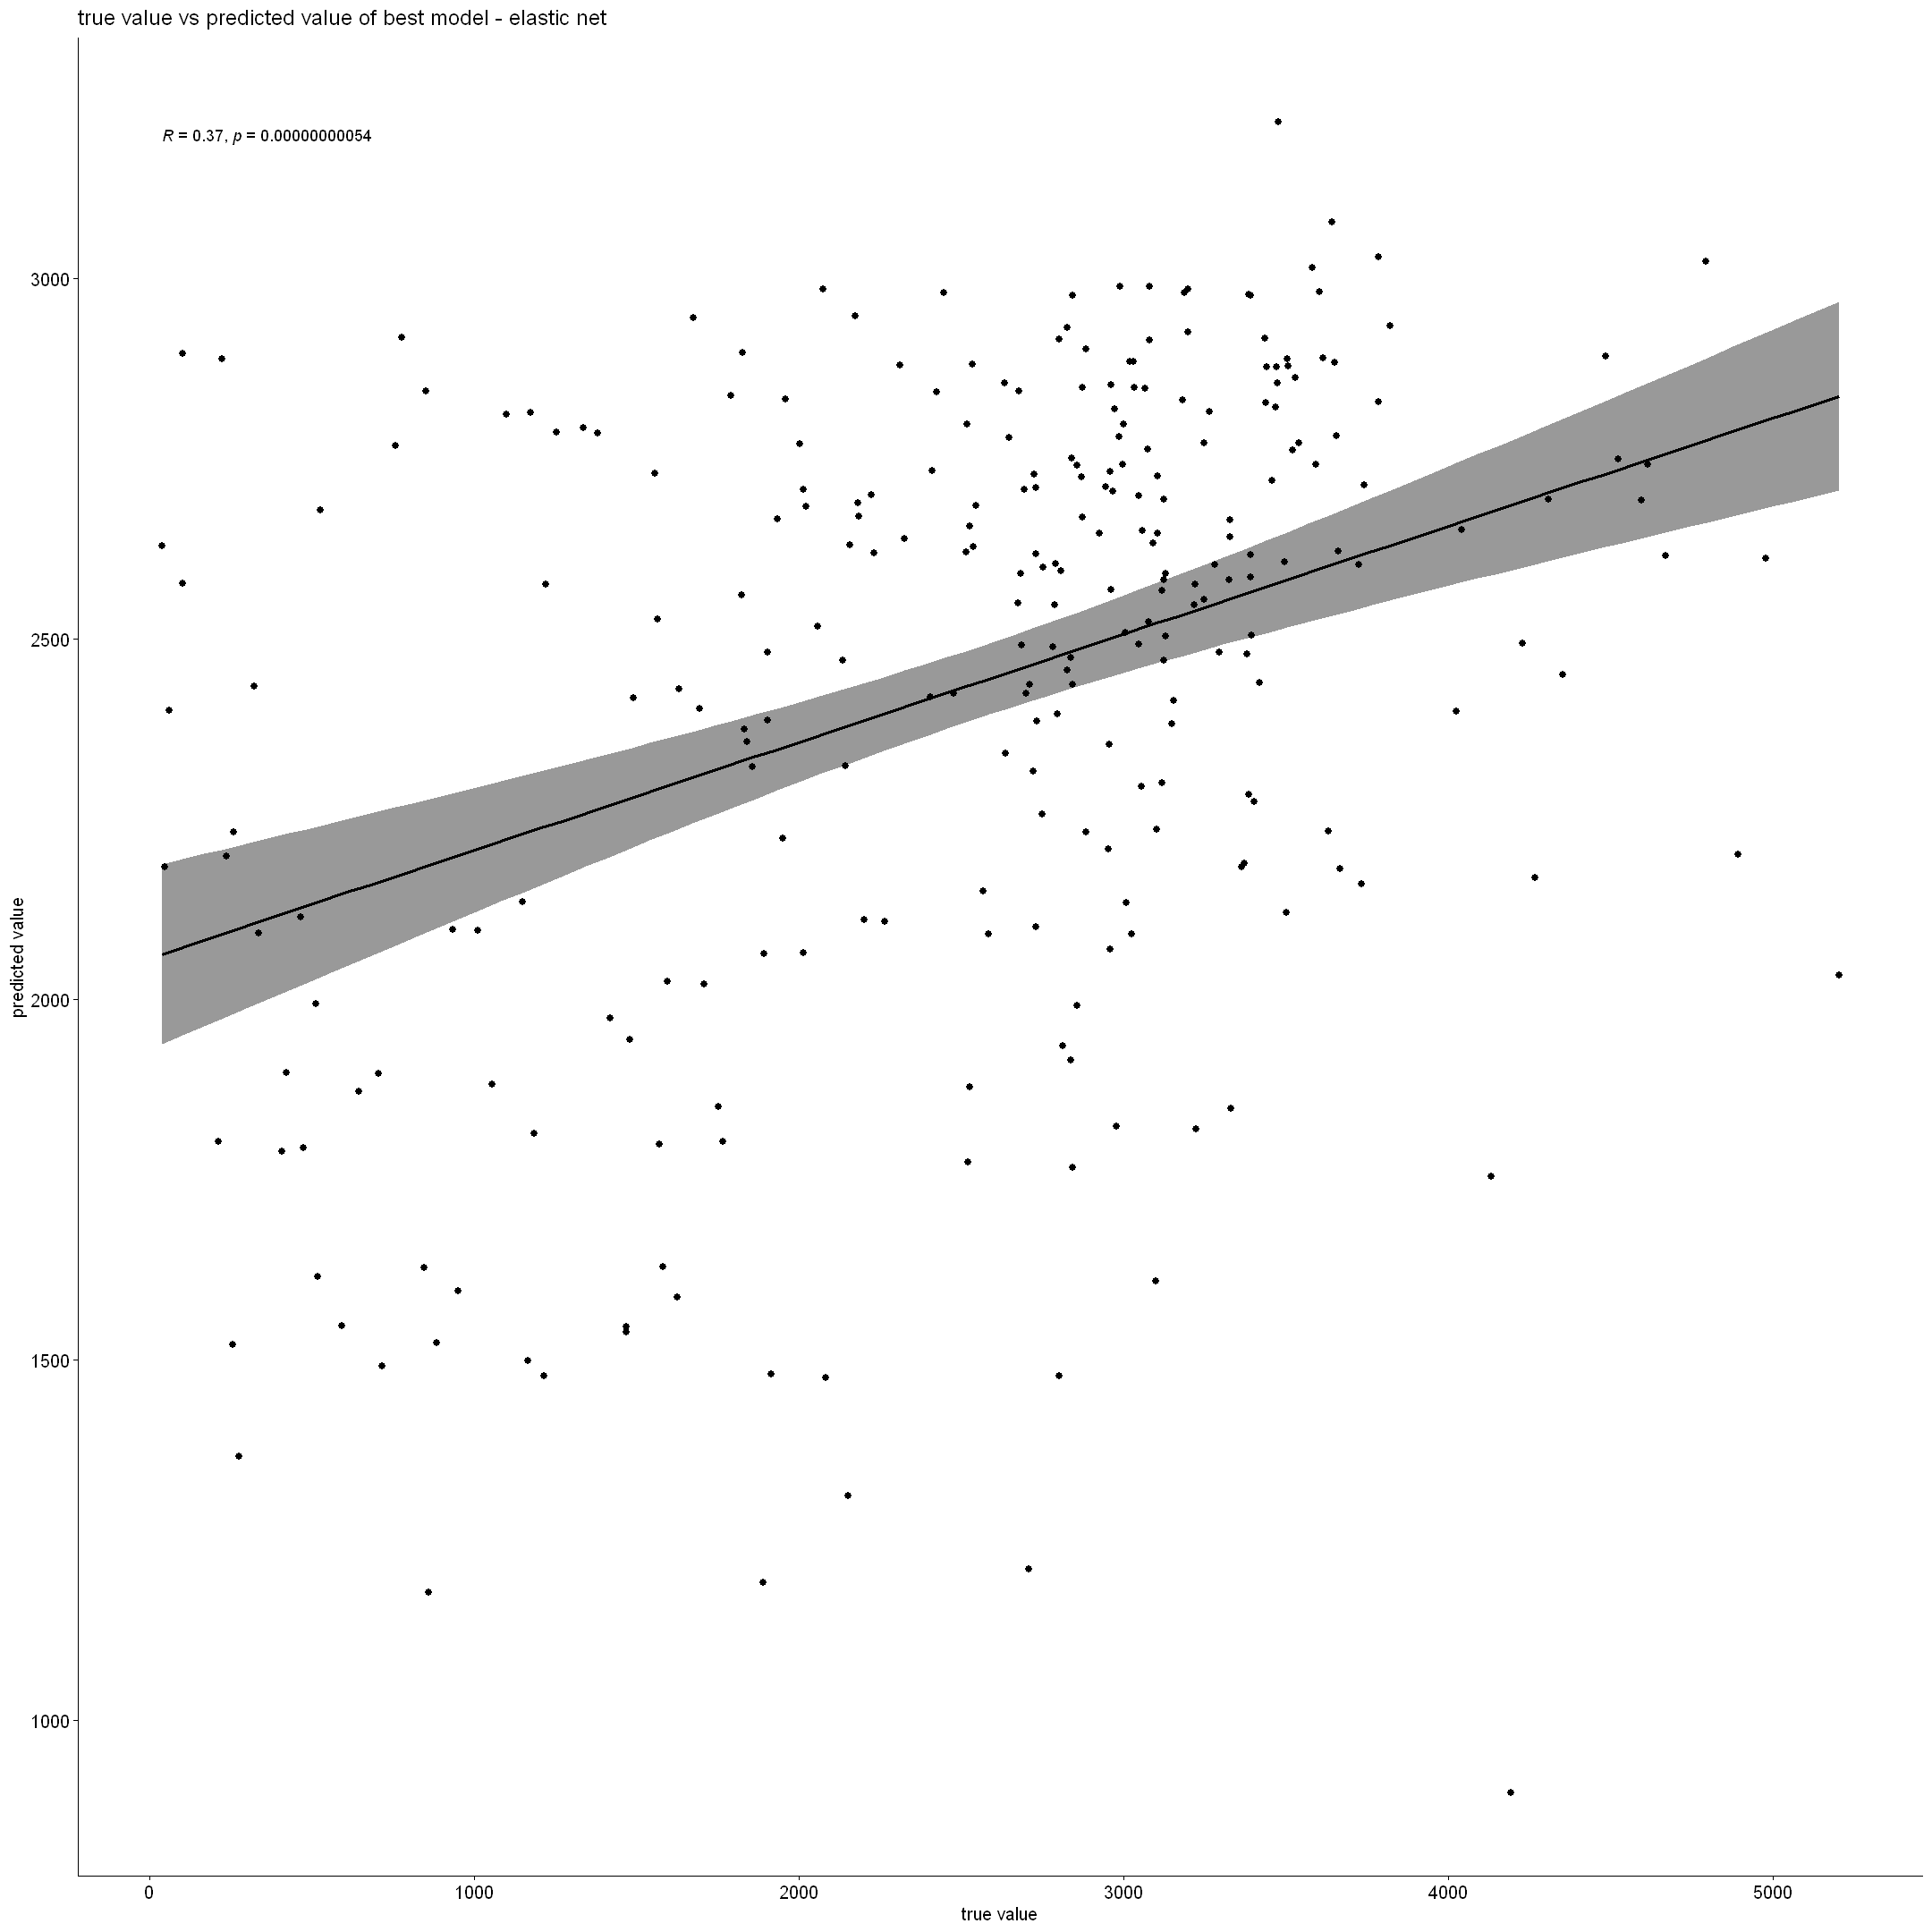

In [8]:
# model to predict the overal survival time
library(glmnet)
library(ggpubr)
set.seed(1213)
train_split = rbinom(length(all_ALL$Gender),1,0.85)
train_split = train_split == 1
training_set = all_ALL[train_split,]
testing_set = all_ALL[!train_split,]

train_inputs = model.matrix(Overall.Survival.Time.in.Days ~Gender+Race+Ethnicity+Age.at.Diagnosis.in.Days+WBC.at.Diagnosis+
                            MRD.Day.29+WBC.at.Diagnosis+DNA.Index+BMA.Blasts.Day.8+BMA.Blasts.Day.29+Relapse,training_set)
test_inputs = model.matrix(Overall.Survival.Time.in.Days ~Gender+Race+Ethnicity+Age.at.Diagnosis.in.Days+WBC.at.Diagnosis+
                            MRD.Day.29+WBC.at.Diagnosis+DNA.Index+BMA.Blasts.Day.8+BMA.Blasts.Day.29+Relapse,testing_set)
train_outputs = training_set[!rowSums(is.na(training_set[c("Gender","Race","Ethnicity","Age.at.Diagnosis.in.Days","WBC.at.Diagnosis",
                       "Overall.Survival.Time.in.Days","WBC.at.Diagnosis","MRD.Day.29","DNA.Index",
                "BMA.Blasts.Day.8","BMA.Blasts.Day.29","Relapse")])),]
train_outputs = train_outputs$Overall.Survival.Time.in.Days
test_outputs = testing_set[!rowSums(is.na(testing_set[c("Gender","Race","Ethnicity","Age.at.Diagnosis.in.Days","WBC.at.Diagnosis",
                       "Overall.Survival.Time.in.Days","WBC.at.Diagnosis","MRD.Day.29","DNA.Index",
                "BMA.Blasts.Day.8","BMA.Blasts.Day.29","Relapse")])),]
test_outputs = test_outputs$Overall.Survival.Time.in.Days

ridge_survival = glmnet(train_inputs,train_outputs,family= "gaussian",alpha = 0)
elastic_survival = glmnet(train_inputs,train_outputs,family="gaussian",alpha=0.5)
lasso_survival = glmnet(train_inputs,train_outputs,family="gaussian",alpha=1)

# coef(lasso_survival)
lasso_pred = predict(lasso_survival, s = lasso_survival$lambda.1se,newx=test_inputs)
mse_lasso = mean((test_outputs-lasso_pred)^2)
mse_lasso
tLL = lasso_survival$nulldev - deviance(lasso_survival)
k = lasso_survival$df
n = lasso_survival$nobs
lasso_aicc = min(-tLL+2*k+2*k*(k+1)/(n-k-1))
tLL = ridge_survival$nulldev - deviance(ridge_survival)
k = ridge_survival$df
n = ridge_survival$nobs
ridge_aicc = -tLL+2*k+2*k*(k+1)/(n-k-1)
tLL = elastic_survival$nulldev - deviance(elastic_survival)
k = elastic_survival$df
n = elastic_survival$nobs
elastic_aicc = -tLL+2*k+2*k*(k+1)/(n-k-1)

lasso_aicc
min(ridge_aicc)
min(elastic_aicc)

best_ridge_aic = match(c(min(ridge_aicc)),ridge_aicc)
best_elastic_aic = match(c(min(elastic_aicc)),elastic_aicc)

best_ridge_pred = predict(ridge_survival,s = ridge_survival$lambda[best_ridge_aic],newx=test_inputs)
mse_best_ridge = mean((test_outputs-best_ridge_pred)^2)
mse_best_ridge

best_elastic_pred = predict(elastic_survival, s = elastic_survival$lambda[best_elastic_aic],newx=test_inputs)
mse_best_elastic = mean((test_outputs-best_elastic_pred)^2)
mse_best_elastic

pred_cor_ridge = data.frame(matrix(0,nrow = length(test_outputs),ncol = 2))
colnames(pred_cor_ridge) = c("predicted value","true value")
pred_cor_ridge["predicted value"] = best_ridge_pred
pred_cor_ridge["true value"] = test_outputs

pred_cor_elastic = data.frame(matrix(0,nrow = length(test_outputs),ncol = 2))
colnames(pred_cor_elastic) = c("predicted value","true value")
pred_cor_elastic["predicted value"] = best_elastic_pred
pred_cor_elastic["true value"] = test_outputs

par(mfrow = c(1,2))
plot(ridge_survival,xvar = "lambda",label=TRUE)
plot(elastic_survival,xvar = "lambda",label=TRUE)
par(mfrow = c(1,2))
ggscatter(pred_cor_ridge, x = "true value", y = "predicted value",add = "reg.line",conf.int = TRUE, 
          cor.coef = TRUE, cor.method = "pearson",main = "true value vs predicted value of best ridge model")
ggscatter(pred_cor_elastic, x = "true value", y = "predicted value",add = "reg.line",conf.int = TRUE, 
          cor.coef = TRUE, cor.method = "pearson",main = "true value vs predicted value of best model - elastic net")

coef(elastic_survival,s=elastic_survival$lambda[best_elastic_aic])

`geom_smooth()` using formula 'y ~ x'
Warning message:
"Removed 11 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 11 rows containing non-finite values (stat_cor)."Warning message:
"Removed 11 rows containing missing values (geom_point)."


Call:
lm(formula = Overall.Survival.Time.in.Days ~ Gender + Race + 
    Ethnicity + Age.at.Diagnosis.in.Days + WBC.at.Diagnosis + 
    MRD.Day.29 + WBC.at.Diagnosis + DNA.Index + BMA.Blasts.Day.8 + 
    BMA.Blasts.Day.29 + Relapse, data = training_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-2922.4  -586.5   123.2   593.6  2994.5 

Coefficients:
                                                Estimate Std. Error t value
(Intercept)                                   2279.06340  403.49843   5.648
GenderMale                                      27.74299   52.09396   0.533
RaceAsian                                        7.67491  363.85874   0.021
RaceBlack or African American                   82.13927  354.49324   0.232
RaceNative Hawaiian or other Pacific Islander  633.22628  497.57866   1.273
RaceUnknown                                    388.39330  351.04191   1.106
RaceWhite                                      324.10419  341.87366   0.948
EthnicityNot Hispanic or Lati

[1] 23722.63

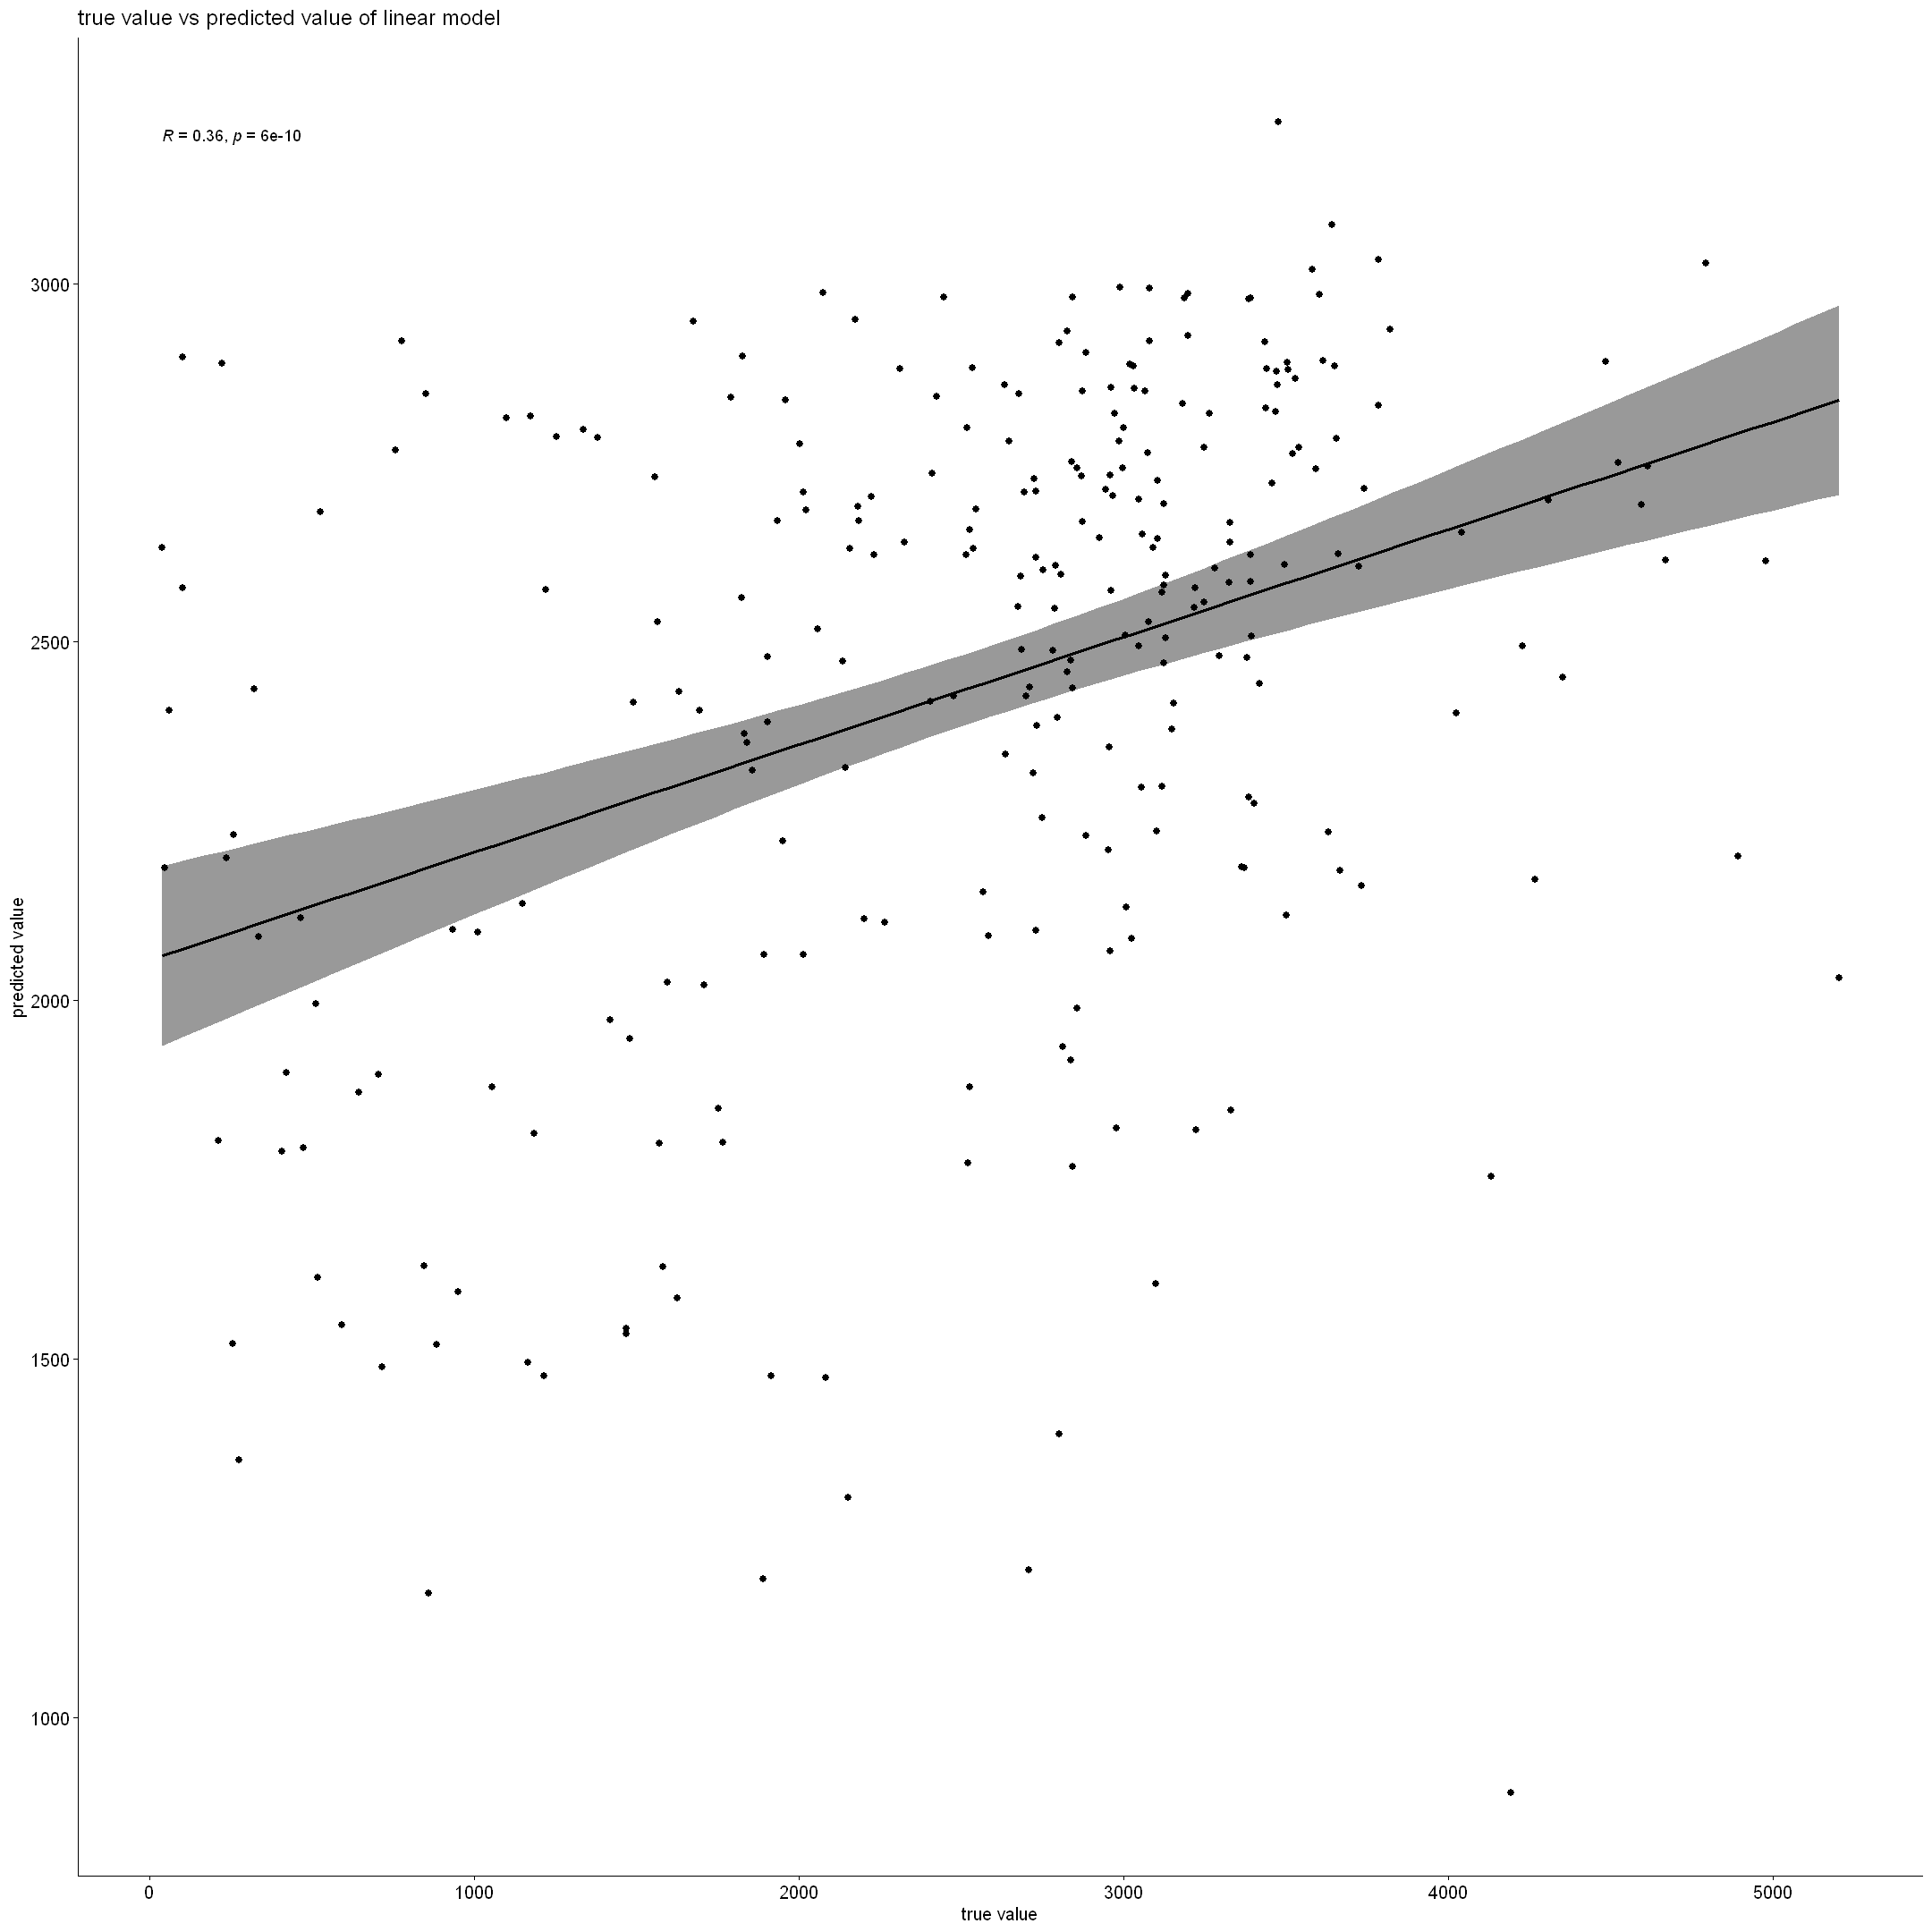

In [9]:
# using linear model
lm_survival = lm(Overall.Survival.Time.in.Days ~ Gender+Race+Ethnicity+Age.at.Diagnosis.in.Days+WBC.at.Diagnosis+
                            MRD.Day.29+WBC.at.Diagnosis+DNA.Index+BMA.Blasts.Day.8+BMA.Blasts.Day.29+Relapse,data=training_set)
lm_predict = predict(lm_survival,newdata = testing_set)
lm_cor = data.frame(matrix(0,nrow=length(lm_predict),ncol=2))
colnames(lm_cor) = c("predicted value","true value")
lm_cor["predicted value"] = lm_predict
lm_cor["true value"] = testing_set$Overall.Survival.Time.in.Days
ggscatter(lm_cor, x = "true value", y = "predicted value",add = "reg.line",conf.int = TRUE, 
          cor.coef = TRUE, cor.method = "pearson",main = "true value vs predicted value of linear model")
summary(lm_survival)
AIC(lm_survival)

`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
Warning message:
"Removed 20 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 20 rows containing non-finite values (stat_cor)."Warning message:
"Removed 20 rows containing missing values (geom_point)."

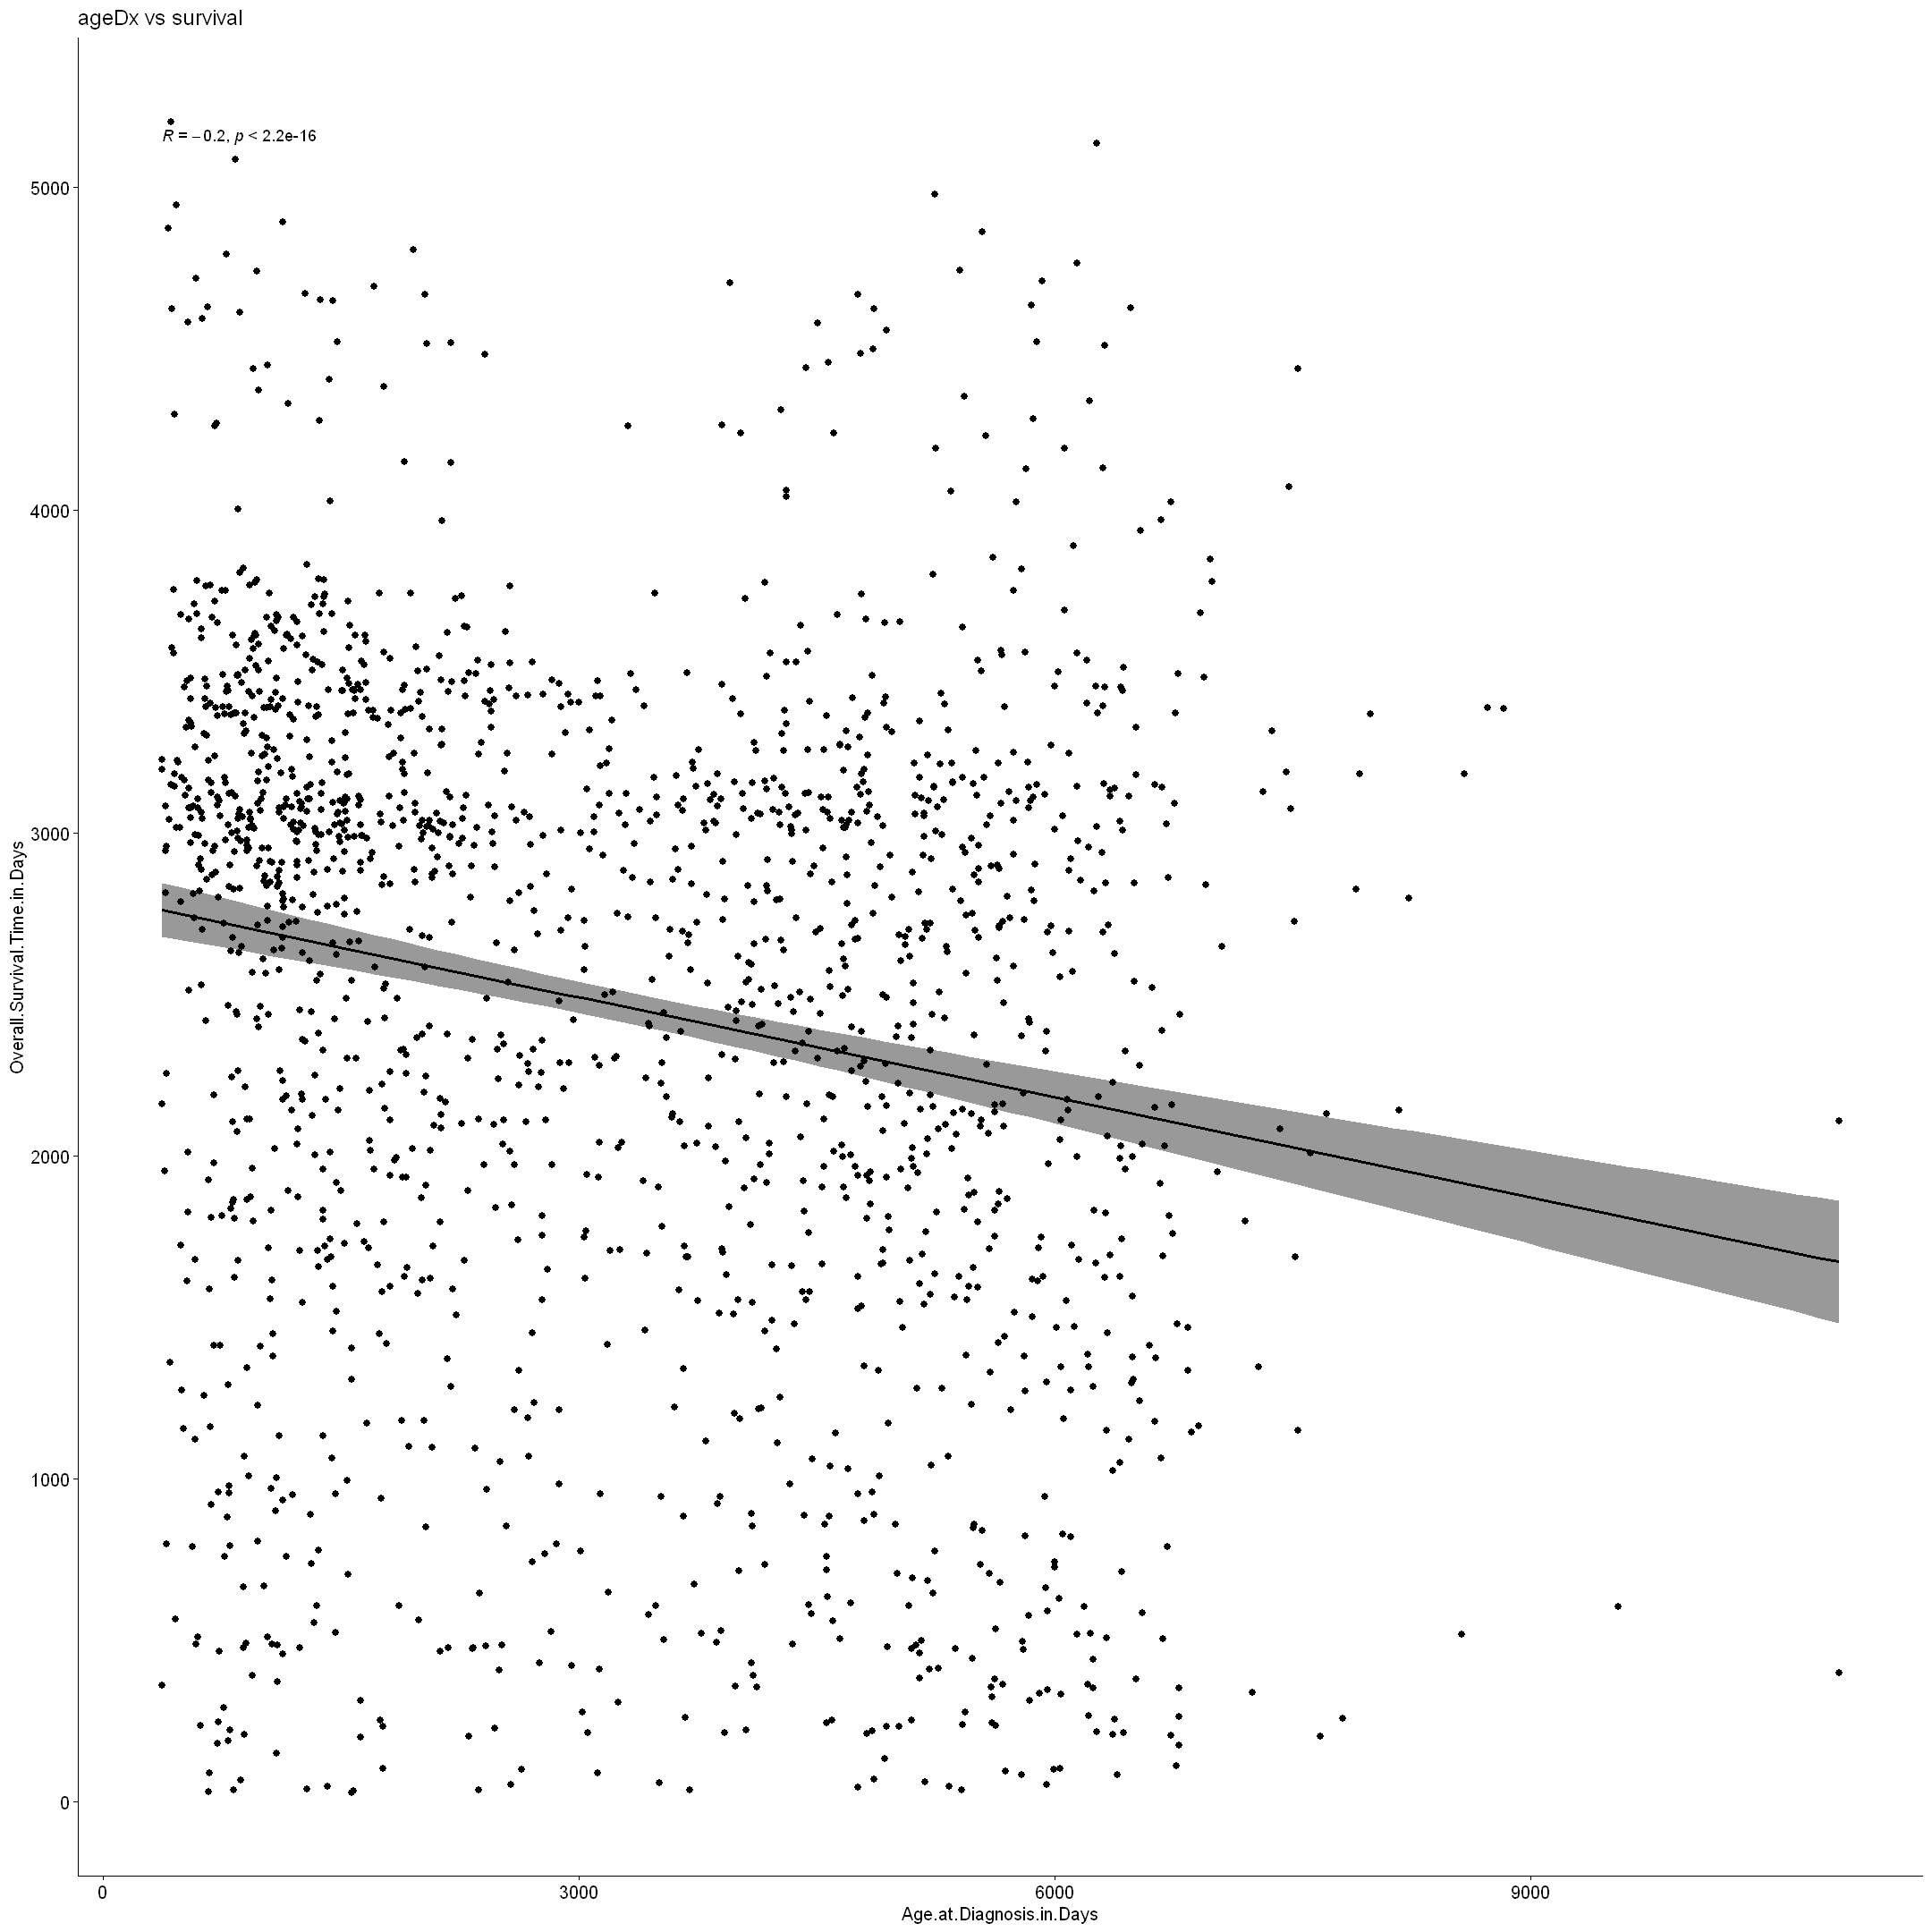

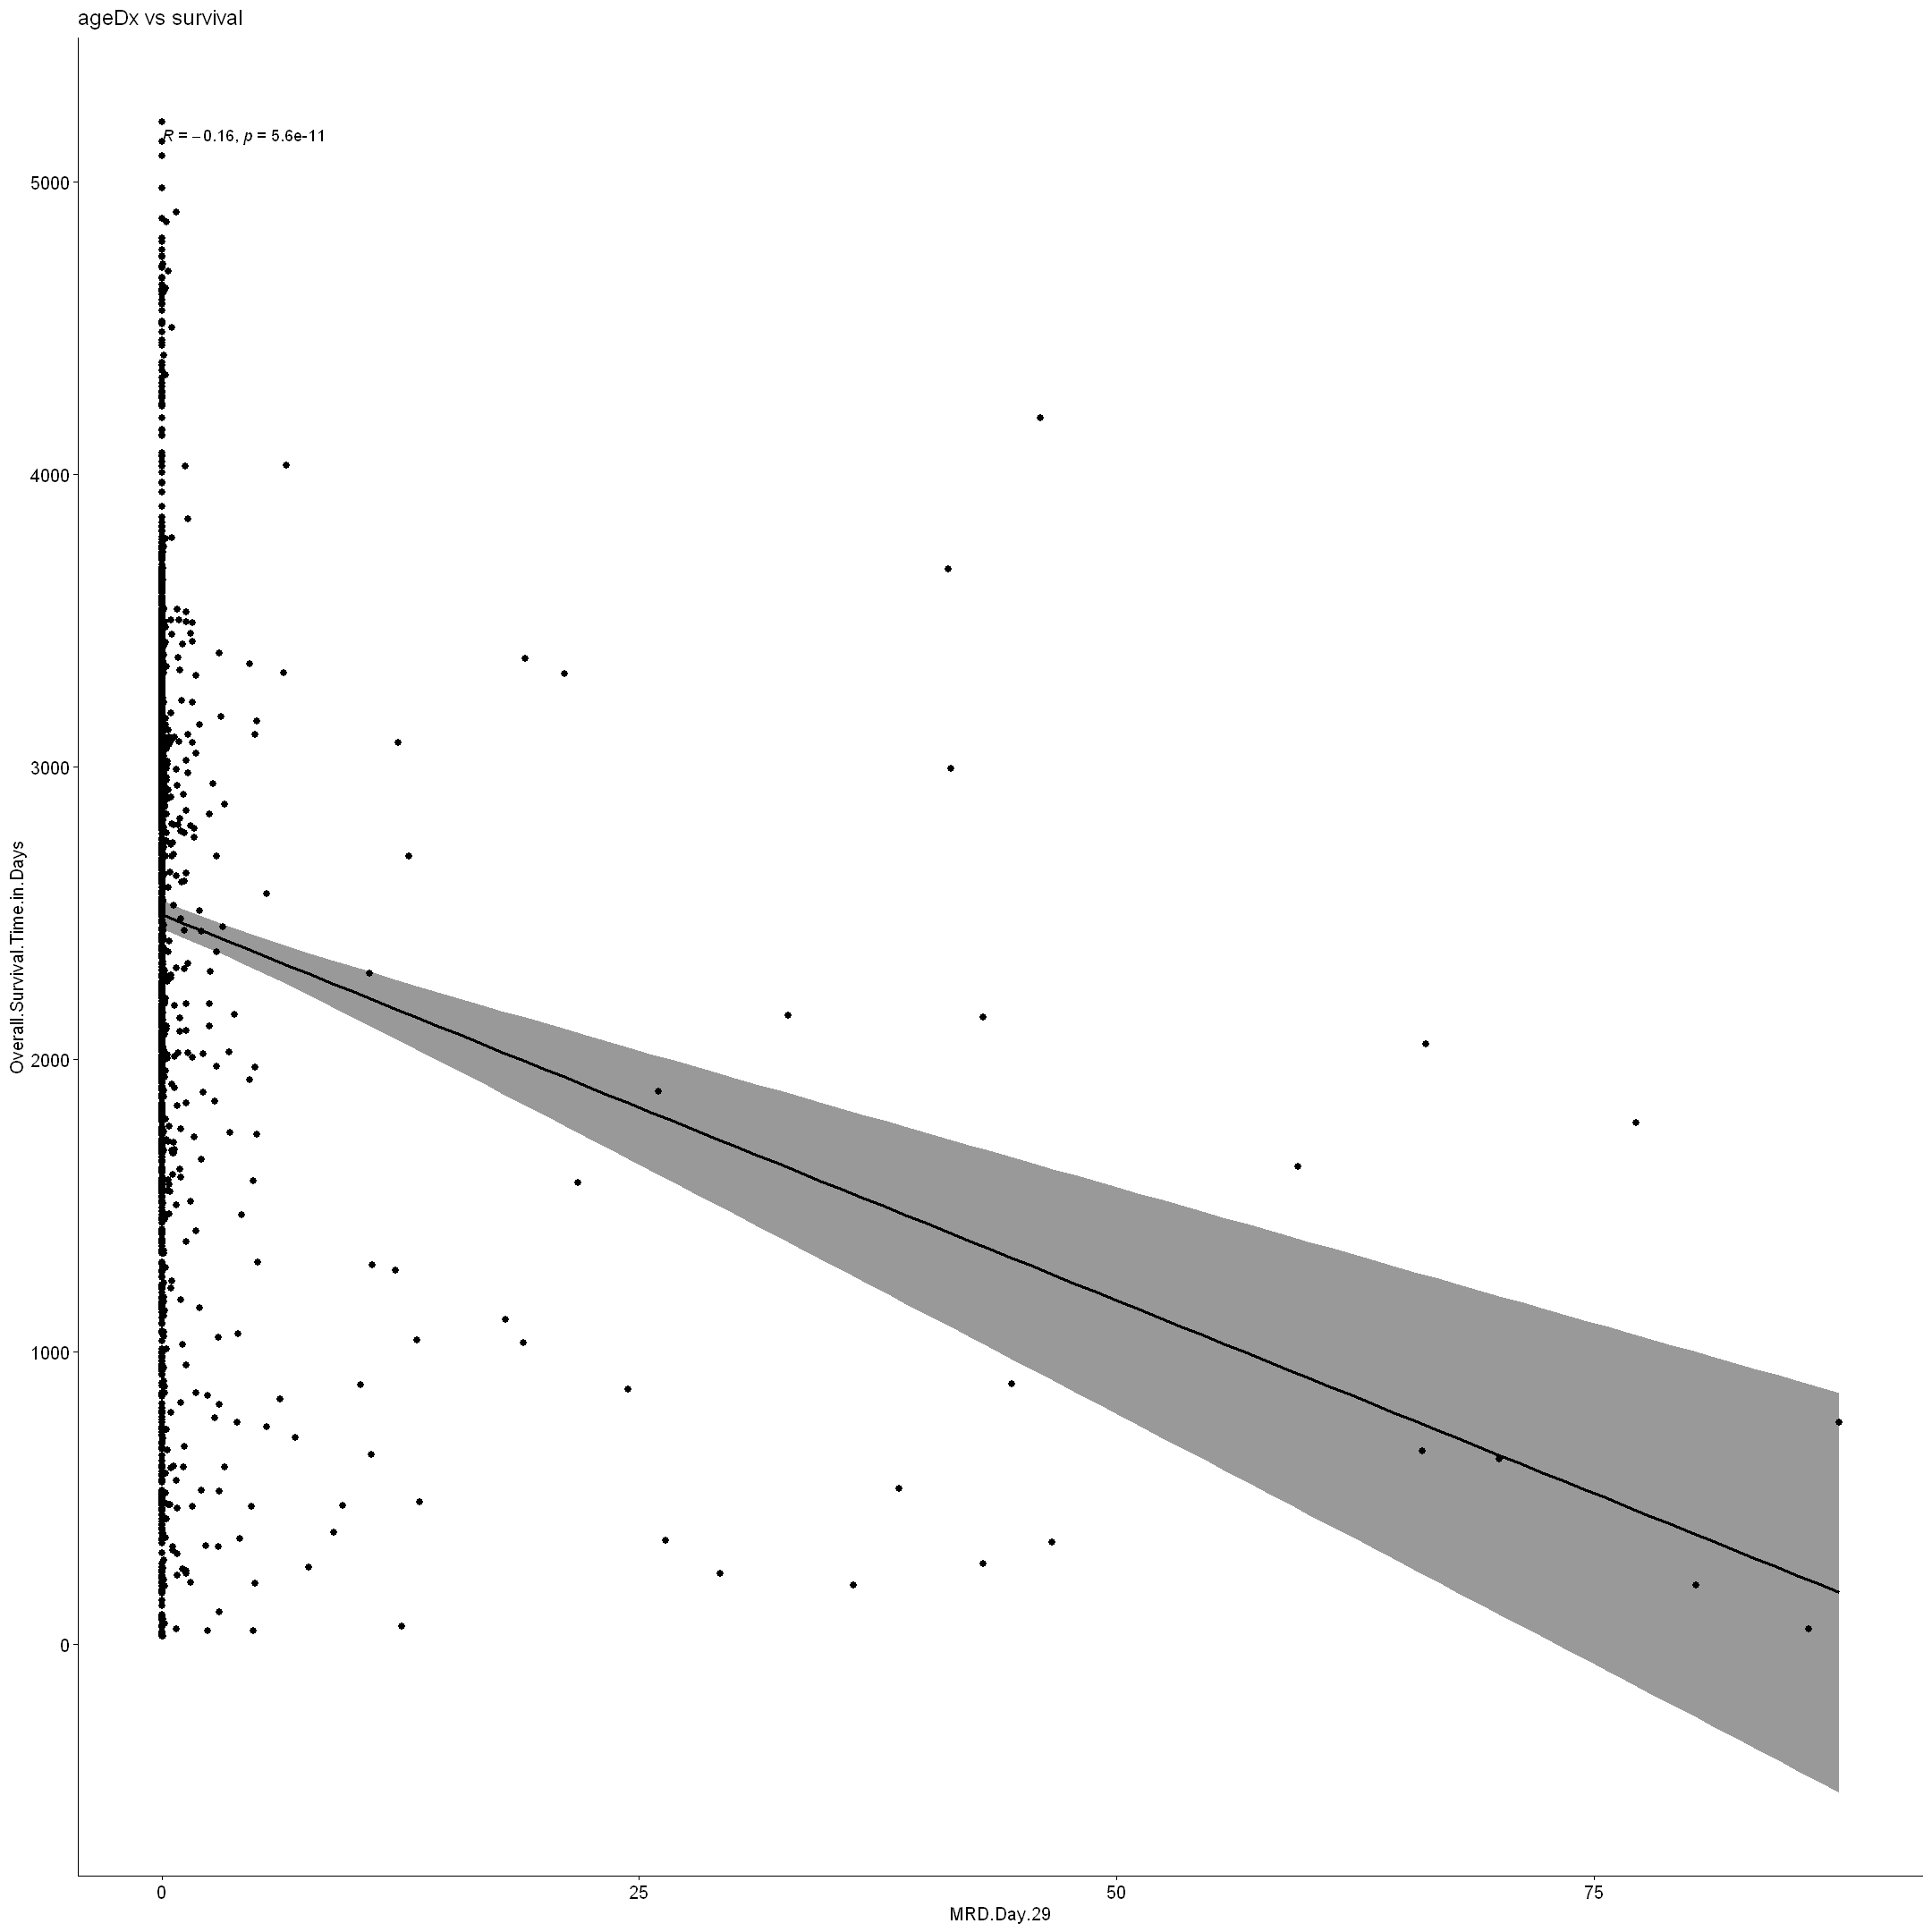

In [10]:
# further investigating correlations
ggscatter(all_ALL, x = "Age.at.Diagnosis.in.Days", y = "Overall.Survival.Time.in.Days",add = "reg.line",conf.int = TRUE, 
          cor.coef = TRUE, cor.method = "pearson",main = "ageDx vs survival")
ggscatter(all_ALL, x = "MRD.Day.29", y = "Overall.Survival.Time.in.Days",add = "reg.line",conf.int = TRUE, 
          cor.coef = TRUE, cor.method = "pearson",main = "ageDx vs survival")

package 'ggfortify' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jhend\AppData\Local\Temp\RtmpAPyEgc\downloaded_packages


Warning message:
"package 'ggfortify' was built under R version 3.6.3"

  [1] 2447  3612+ 3821+ 3680+ 3668+ 2403+ 3781+ 3593+ 3529+ 3612+ 3598+ 3403+
 [13] 3575+ 3786+ 3572+ 3833+ 2755+ 3626+ 3784+ 3024+ 3766+ 3767+  777+ 3679+
 [25] 1909+ 2687+ 3540+ 3479+ 2954+ 1752  3632+ 3734+ 3442+ 3444+ 3443+   65+
 [37] 1904+ 2749+ 3506+ 2887+ 3743+ 3622+ 3460+ 2865+ 3733+ 2952+ 3424+ 3458+
 [49] 3742+ 1179+ 3669+ 3611+ 3490+ 3668+ 3538+ 1418  3641+ 3445+ 3744+ 3768+
 [61] 3423+  775  3055+ 3752+ 3468+ 3362+ 3492+ 3656+ 3680+ 3522+  308   149 
 [73] 2110  3582+  179  3550+ 3643+ 3664+ 3065  3556+ 3742+ 3051  2628+ 3640+
 [85] 3604+ 3381+ 3601+ 3424+ 3417+ 3037+ 3710+ 3429+ 3731+ 3493+ 3394+ 3612+
 [97] 2174+ 3623+  252  3553+

Call: survfit(formula = Surv(Overall.Survival.Time.in.Days, Status) ~ 
    1, data = all_ALL)

 time n.risk n.event survival  std.err lower 95% CI upper 95% CI
    1   1783       0    1.000 0.000000        1.000        1.000
   30   1781       0    1.000 0.000000        1.000        1.000
   60   1769       2    0.999 0.000796        0.997        1.000
   90   1762       2    0.998 0.001127        0.996        1.000
  180   1752       7    0.994 0.001871        0.990        0.997
  270   1719      26    0.979 0.003418        0.972        0.986
  360   1703      14    0.971 0.004000        0.963        0.979
  450   1684      16    0.962 0.004569        0.953        0.971
  540   1646      29    0.945 0.005431        0.935        0.956
  630   1628      17    0.936 0.005869        0.924        0.947
  720   1611      14    0.927 0.006201        0.915        0.940
  810   1592      15    0.919 0.006532        0.906        0.932
  900   1573      13    0.911 0.006803        0.898        0

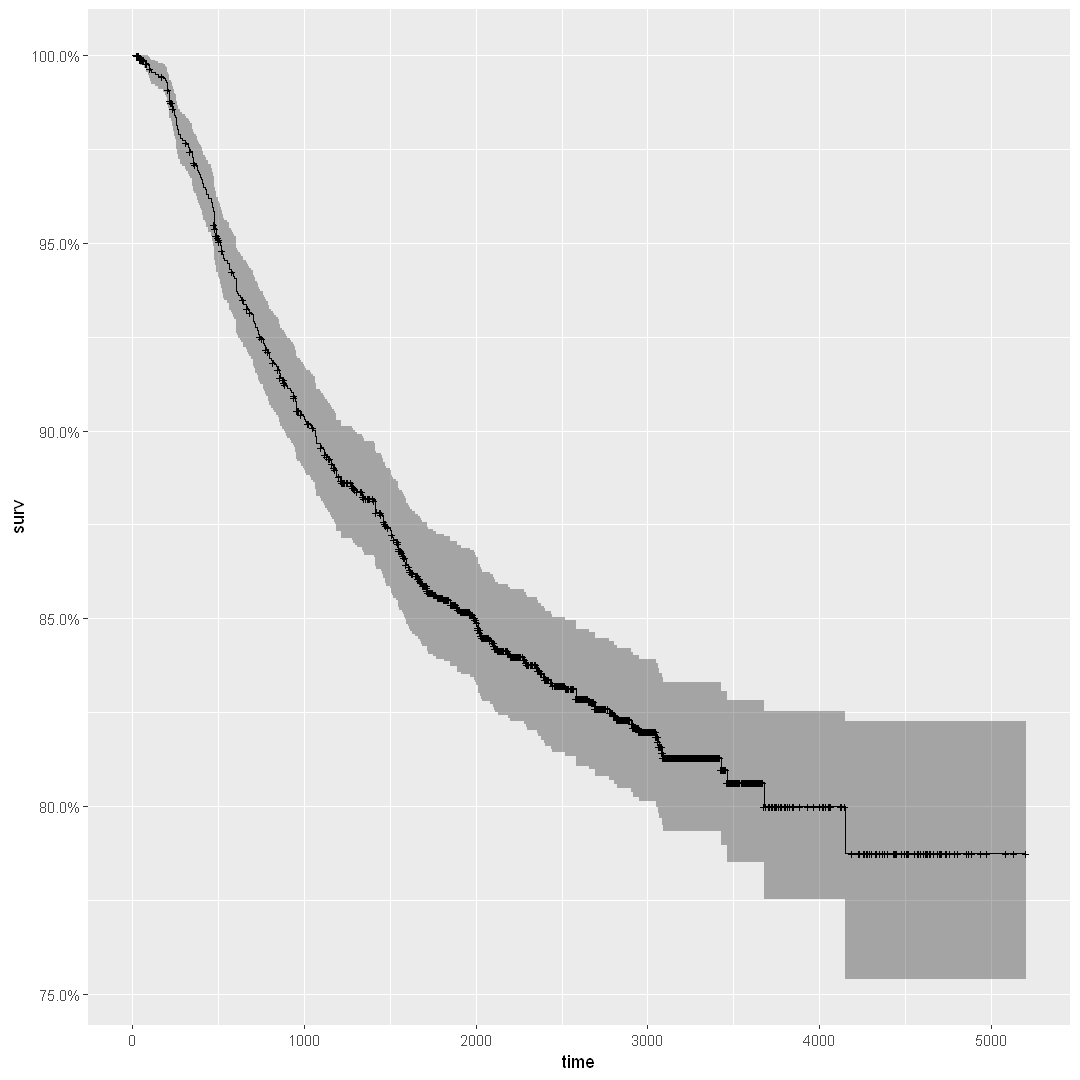

In [11]:
# Survival analysis hazard based models because aren't supposed to use linear or logistic
library(survival)
library(ggplot2)
library(dplyr)
# install.packages("ggfortify")
library(ggfortify)
options(repr.plot.width = 9, repr.plot.height = 9)
# lm_survival = lm(Overall.Survival.Time.in.Days ~ Gender+Race+Ethnicity+Age.at.Diagnosis.in.Days+WBC.at.Diagnosis+
#                             MRD.Day.29+WBC.at.Diagnosis+DNA.Index+BMA.Blasts.Day.8+BMA.Blasts.Day.29+Relapse,data=training_set)

# set vital status to 1 for dead and 2 for censored
vit_stats = all_ALL$Vital.Status == "Dead"
all_ALL$Status[vit_stats] = 1
all_ALL$Status[!vit_stats] = 0

# building standard survival object for cox proportional hazard model
surv_obj = with(all_ALL, Surv(Overall.Survival.Time.in.Days,Status))
head(surv_obj,100)

# cox_model survival over time
km_fit = survfit(Surv(Overall.Survival.Time.in.Days,Status)~1, data = all_ALL)
summary(km_fit, times =  c(1,30,60,90*(1:10)))
autoplot(km_fit)

Call:
survdiff(formula = Surv(Overall.Survival.Time.in.Days, Status) ~ 
    Relapse, data = all_ALL)

                 N Observed Expected (O-E)^2/E (O-E)^2/V
Relapse=FALSE 1377       66    246.9       133       722
Relapse=TRUE   406      237     56.1       584       722

 Chisq= 722  on 1 degrees of freedom, p= <2e-16 

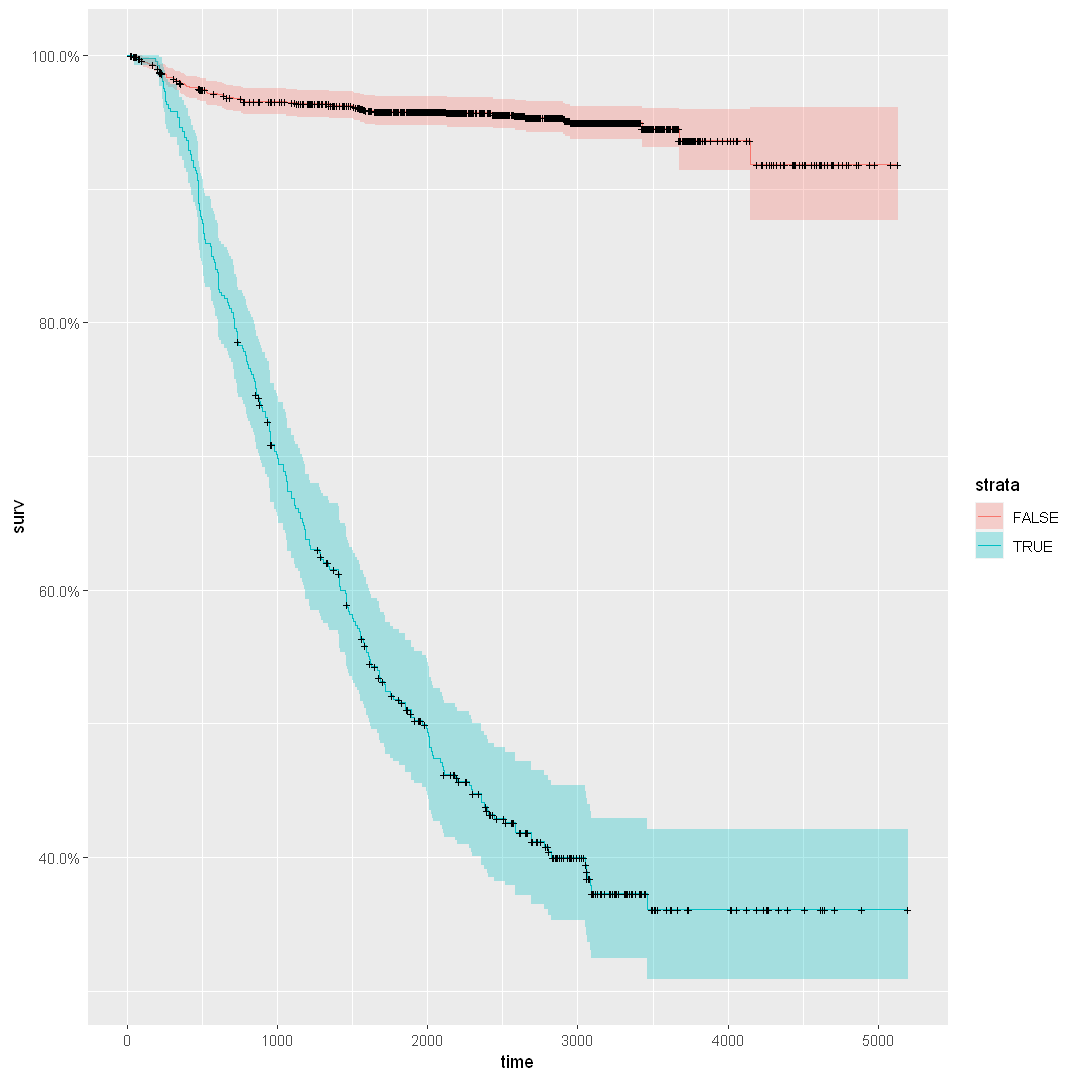

In [12]:
km_relapse_fit = survfit(Surv(Overall.Survival.Time.in.Days,Status)~Relapse, data = all_ALL)
autoplot(km_relapse_fit)
survdiff(Surv(Overall.Survival.Time.in.Days,Status)~Relapse, data = all_ALL)

Call:
survdiff(formula = Surv(Overall.Survival.Time.in.Days, Status) ~ 
    AG, data = all_AG)

               N Observed Expected (O-E)^2/E (O-E)^2/V
AG=LTaverage 934      118      166      13.9      30.9
AG=OVaverage 849      185      137      16.9      30.9

 Chisq= 30.9  on 1 degrees of freedom, p= 0.00000003 

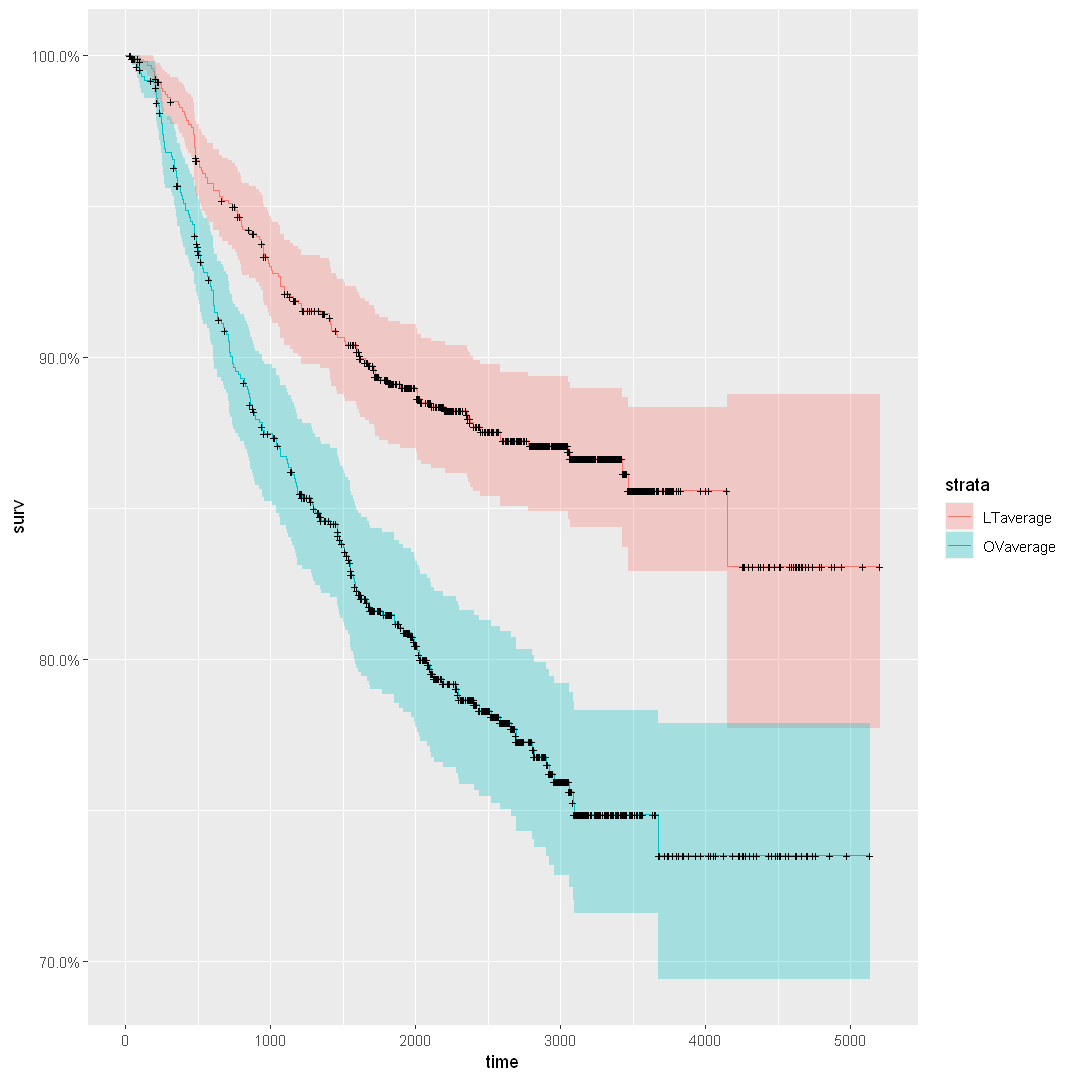

In [13]:
# ALL_cat_age = c(sum(all_ALL$Age.at.Diagnosis.in.Days/365 <= 5),sum(all_ALL$Age.at.Diagnosis.in.Days/365 <=18)-
#                 sum(all_ALL$Age.at.Diagnosis.in.Days/365 <= 5),
#                 sum(all_ALL$Age.at.Diagnosis.in.Days/365 >= 18),sum(all_ALL$Age.at.Diagnosis.in.Days/365 > 65))
all_AG = mutate(all_ALL, AG = ifelse((Age.at.Diagnosis.in.Days < 3260), "LTaverage", "OVaverage"),
              AG = factor(AG))
km_AG_fit = survfit(Surv(Overall.Survival.Time.in.Days,Status)~AG,data = all_AG)
autoplot(km_AG_fit)
survdiff(Surv(Overall.Survival.Time.in.Days,Status) ~  AG, data=all_AG)

Call:
survdiff(formula = Surv(Overall.Survival.Time.in.Days, Status) ~ 
    Gender, data = all_ALL)

                 N Observed Expected (O-E)^2/E (O-E)^2/V
Gender=Female  718      117      121     0.164     0.274
Gender=Male   1065      186      182     0.110     0.274

 Chisq= 0.3  on 1 degrees of freedom, p= 0.6 

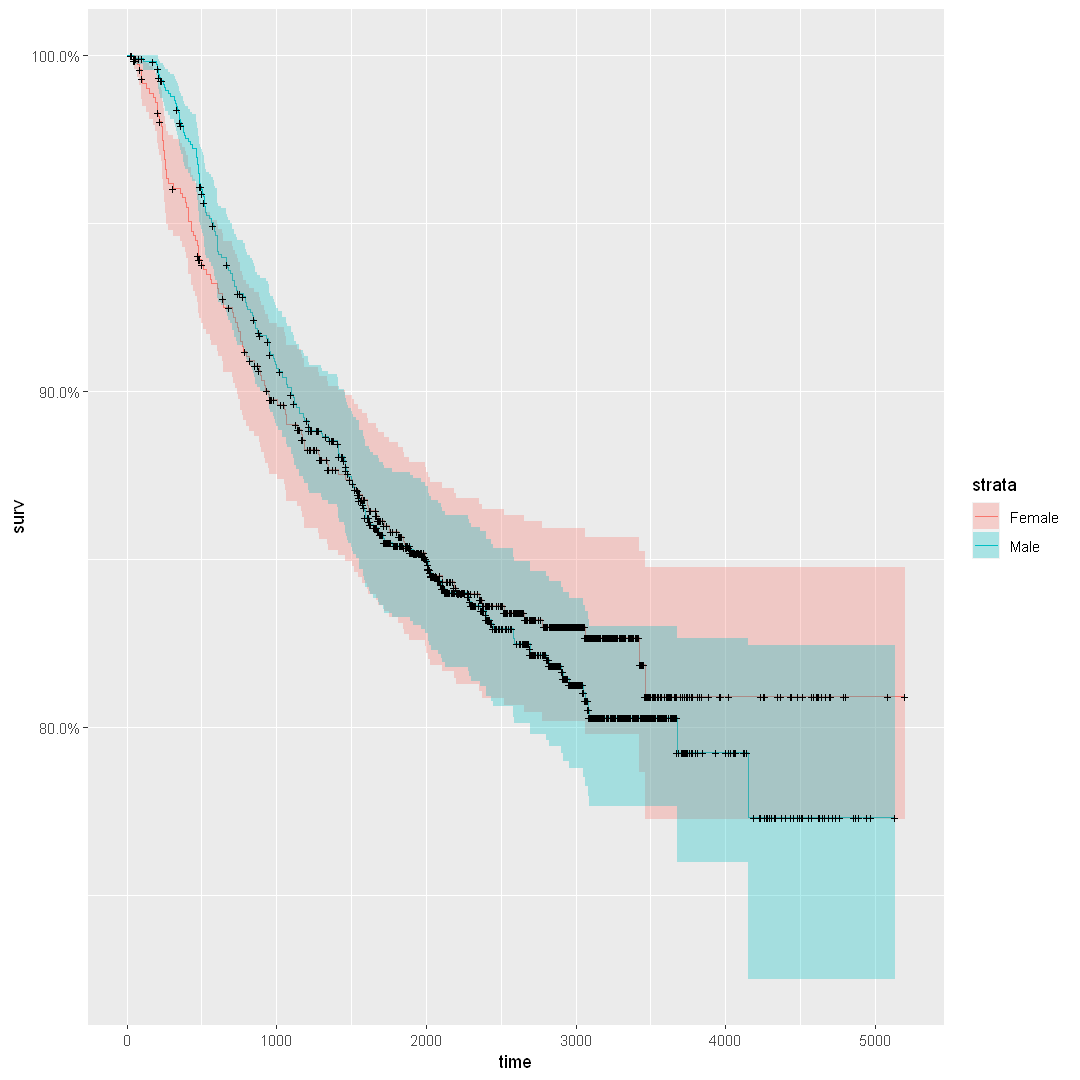

In [14]:
km_gender_fit = survfit(Surv(Overall.Survival.Time.in.Days,Status)~Gender,data = all_ALL)
autoplot(km_gender_fit)
survdiff(Surv(Overall.Survival.Time.in.Days,Status) ~  Gender, data=all_ALL)

Call:
survdiff(formula = Surv(Overall.Survival.Time.in.Days, Status) ~ 
    Race, data = all_ALL)

                                                  N Observed Expected (O-E)^2/E
Race=American Indian or Alaska Native             9        3     1.25     2.434
Race=Asian                                       76        8    12.43     1.578
Race=Black or African American                  126       26    19.82     1.925
Race=Native Hawaiian or other Pacific Islander    9        1     1.73     0.309
Race=Unknown                                    225       41    38.62     0.147
Race=White                                     1338      224   229.14     0.115
                                               (O-E)^2/V
Race=American Indian or Alaska Native              2.444
Race=Asian                                         1.647
Race=Black or African American                     2.061
Race=Native Hawaiian or other Pacific Islander     0.311
Race=Unknown                                       0.168

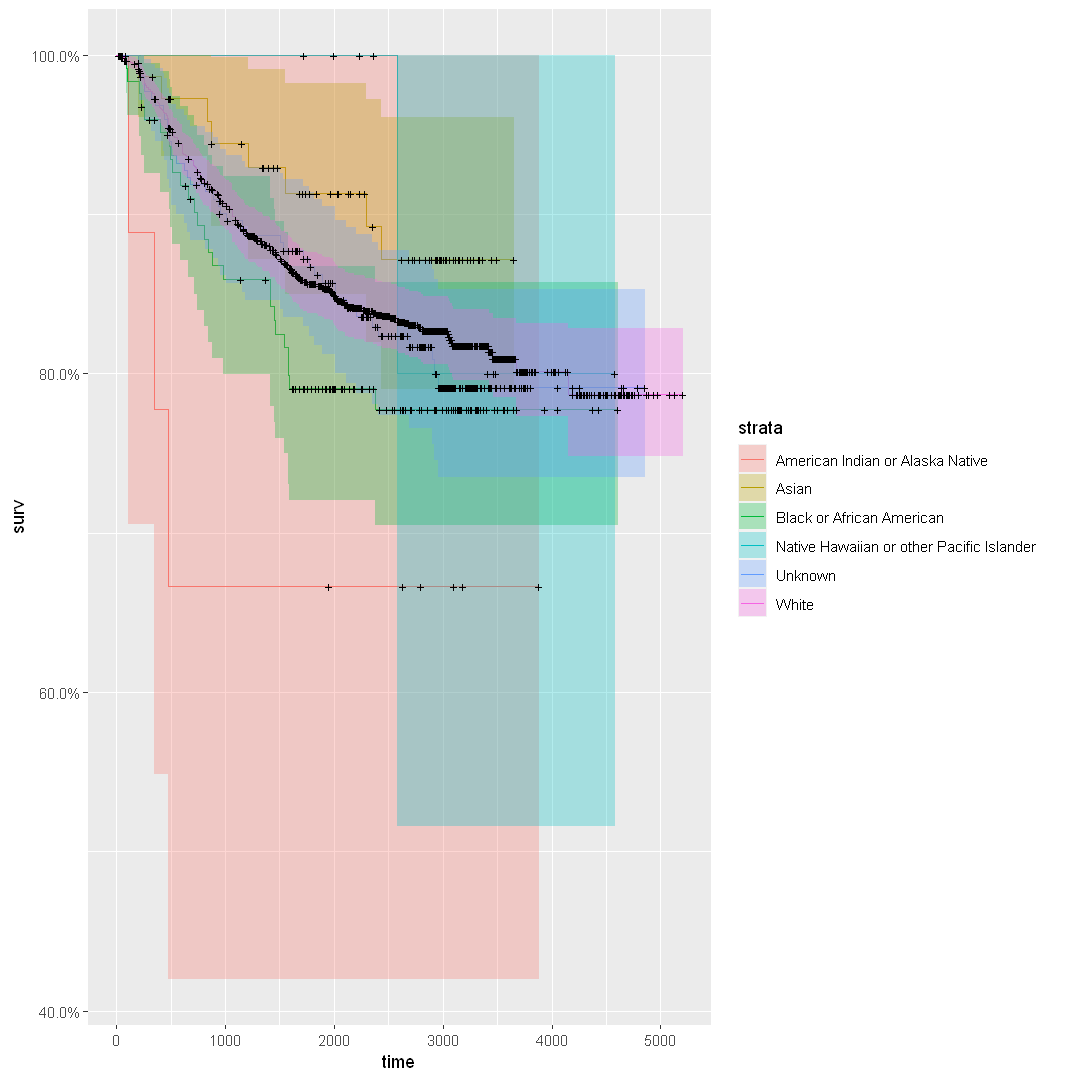

In [15]:
km_gender_fit = survfit(Surv(Overall.Survival.Time.in.Days,Status)~Race,data = all_ALL)
autoplot(km_gender_fit)
survdiff(Surv(Overall.Survival.Time.in.Days,Status) ~  Race, data=all_ALL)

Call:
coxph(formula = Surv(Overall.Survival.Time.in.Days, Status) ~ 
    Gender + Race + Ethnicity + Age.at.Diagnosis.in.Days + WBC.at.Diagnosis + 
        MRD.Day.29 + WBC.at.Diagnosis + DNA.Index + BMA.Blasts.Day.8 + 
        BMA.Blasts.Day.29 + Relapse, data = all_ALL)

  n= 1702, number of events= 286 
   (81 observations deleted due to missingness)

                                                     coef   exp(coef)
GenderMale                                    -0.00722073  0.99280528
RaceAsian                                     -0.61576311  0.54022848
RaceBlack or African American                  0.15694618  1.16993264
RaceNative Hawaiian or other Pacific Islander -0.06806499  0.93419976
RaceUnknown                                   -0.17577766  0.83880446
RaceWhite                                     -0.27479599  0.75972710
EthnicityNot Hispanic or Latino               -0.15693390  0.85476055
EthnicityUnknown                               0.35323007  1.42365864
Age.at.Diagno

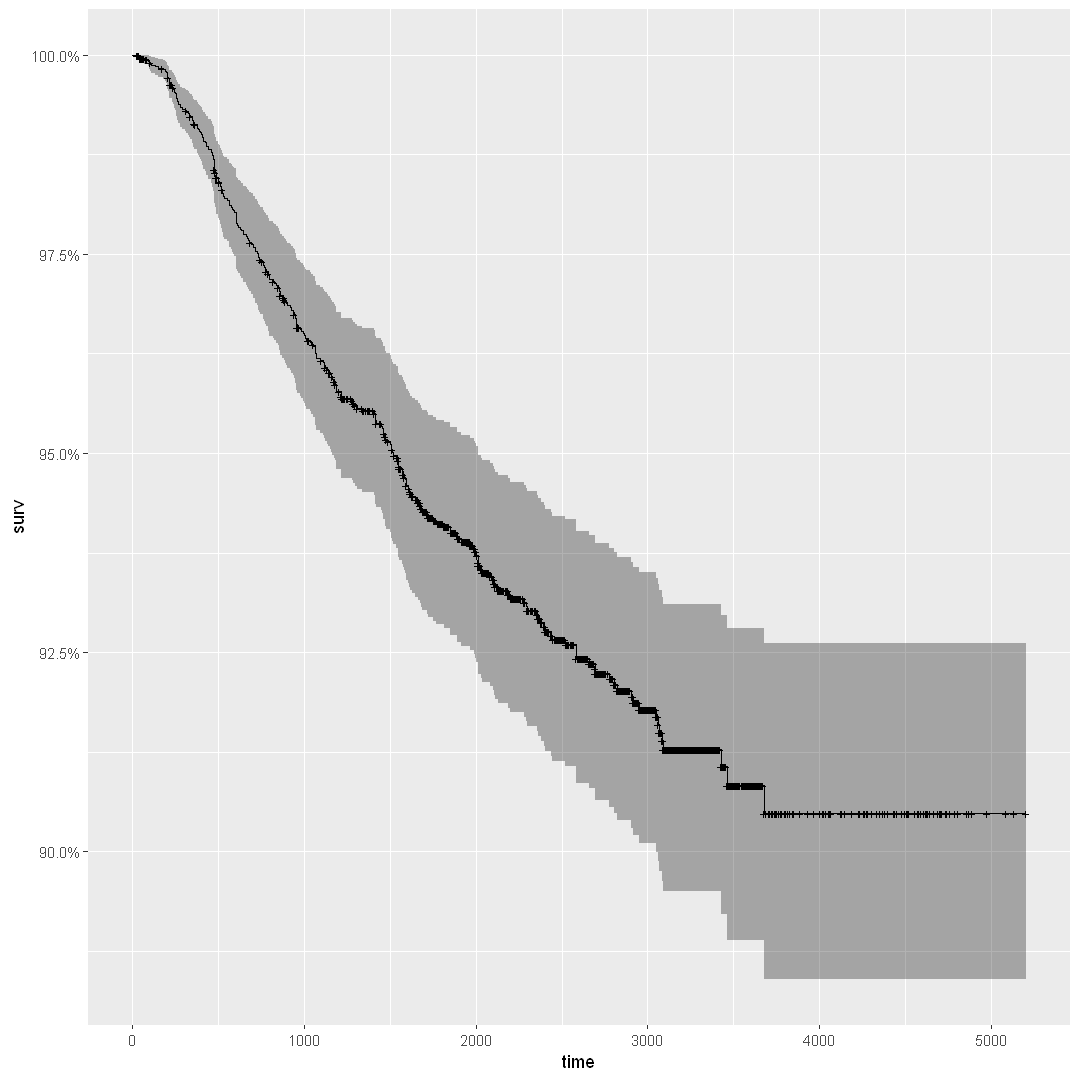

In [16]:
# cox phm that uses more covariates
cox_mod = coxph(Surv(Overall.Survival.Time.in.Days,Status) ~ Gender+Race+Ethnicity+Age.at.Diagnosis.in.Days+WBC.at.Diagnosis+
                            MRD.Day.29+WBC.at.Diagnosis+DNA.Index+BMA.Blasts.Day.8+BMA.Blasts.Day.29+Relapse, data = all_ALL)
summary(cox_mod)
cox_fit = survfit(cox_mod)
autoplot(cox_fit)

Call:
aareg(formula = Surv(Overall.Survival.Time.in.Days, Status) ~ 
    Gender + Race + Ethnicity + Age.at.Diagnosis.in.Days + WBC.at.Diagnosis + 
        MRD.Day.29 + WBC.at.Diagnosis + DNA.Index + BMA.Blasts.Day.8 + 
        BMA.Blasts.Day.29 + Relapse, data = all_ALL)

  n=1702 (81 observations deleted due to missingness)
    273 out of 273 unique event times used

                                                      slope         coef
Intercept                                      0.0002400000  0.000743000
GenderMale                                    -0.0000076100  0.000018400
RaceAsian                                     -0.0002190000 -0.000663000
RaceBlack or African American                 -0.0001250000 -0.000150000
RaceNative Hawaiian or other Pacific Islander -0.0001890000 -0.000221000
RaceUnknown                                   -0.0001840000 -0.000400000
RaceWhite                                     -0.0001720000 -0.000404000
EthnicityNot Hispanic or Latino             

Warning message:
"`group_by_()` was deprecated in dplyr 0.7.0.
Please use `group_by()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."Warning message:
"`mutate_()` was deprecated in dplyr 0.7.0.
Please use `mutate()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."

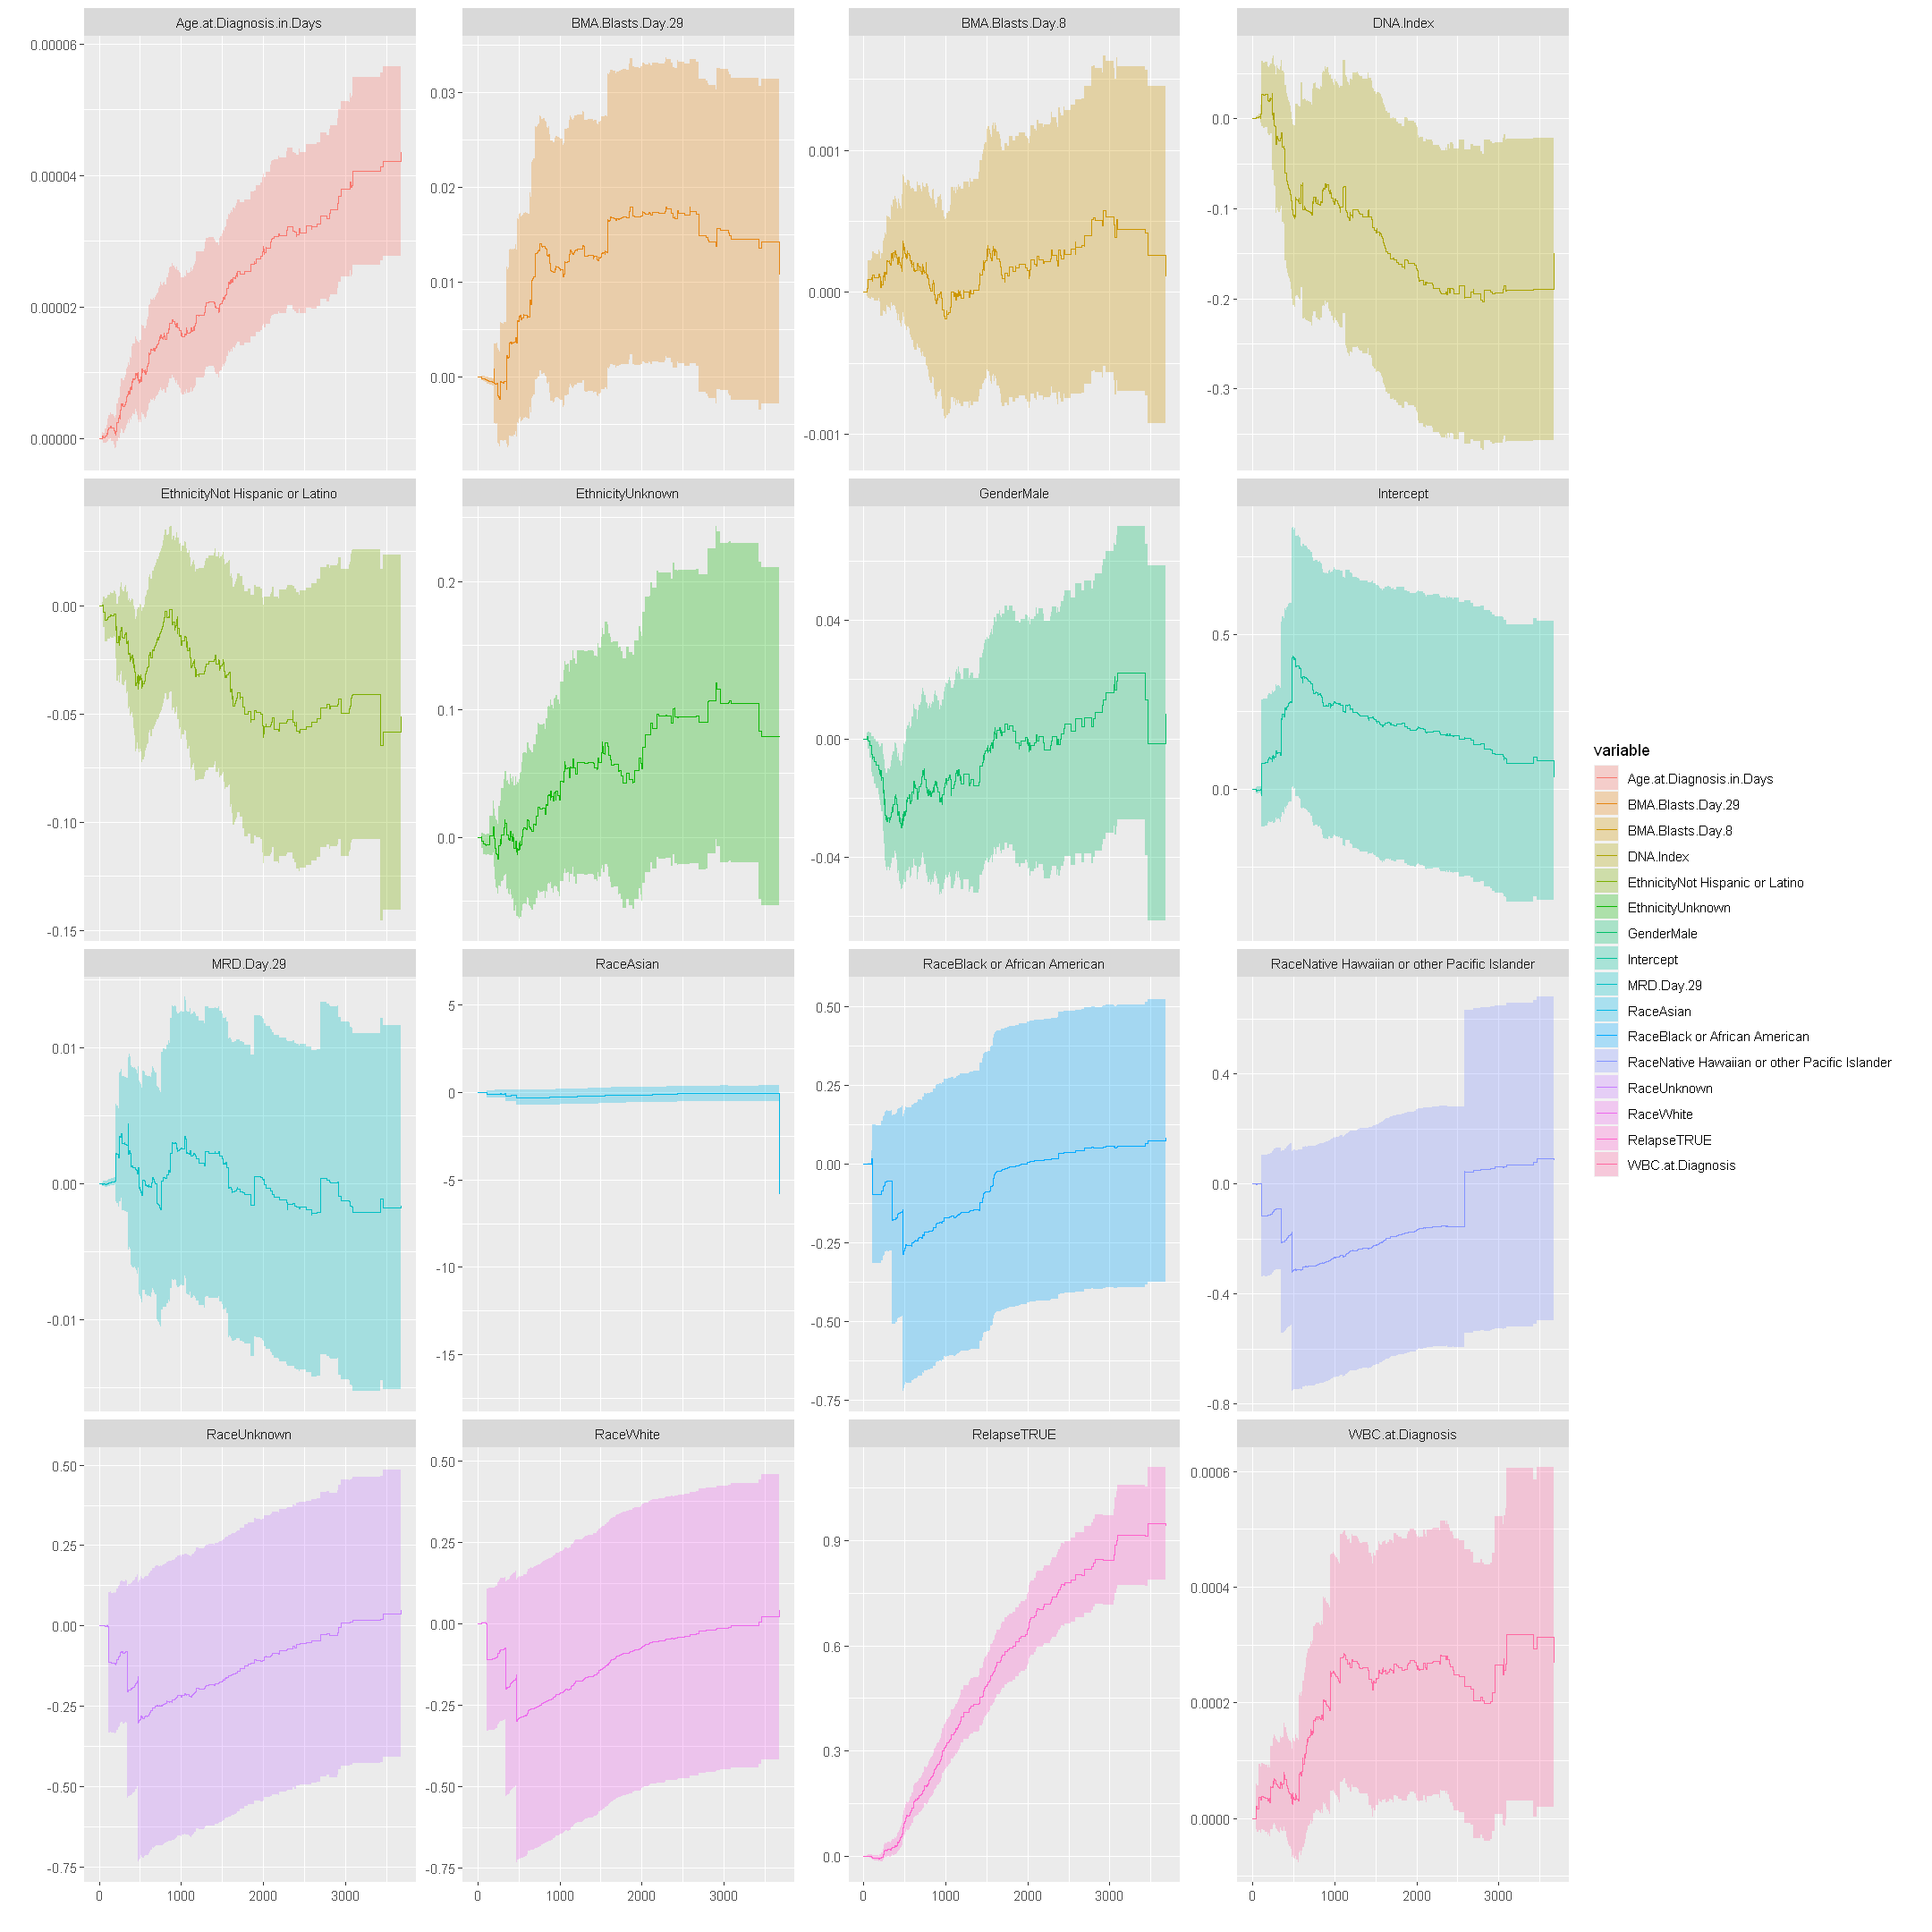

In [17]:
# using aa fit on same variables as above
aa_fit = aareg(Surv(Overall.Survival.Time.in.Days,Status) ~ Gender+Race+Ethnicity+Age.at.Diagnosis.in.Days+WBC.at.Diagnosis+
                            MRD.Day.29+WBC.at.Diagnosis+DNA.Index+BMA.Blasts.Day.8+BMA.Blasts.Day.29+Relapse, data = all_ALL)
aa_fit
options(repr.plot.width = 18, repr.plot.height = 18)
autoplot(aa_fit)


In [22]:
# naive bayes to predict relapse
library(caret)
library(tidyverse)
library(ggplot2)
library(caret)
library(psych)
library(rpart)
# install.packages("randomForest")
library(randomForest)
# install.packages("Amelia")
library(Amelia)
# install.packages("mice")
library(mice)
# install.packages("e1071")
library(e1071)
# install.packages("klaR")
# install.packages("questionr")
# library(klaR)
# install.packages("naivebayes")
var_nb = c("Gender","Race","Ethnicity","Cell.of.Origin",
           "ETV6.RUNX1.Fusion.Status","Age.at.Diagnosis.in.Days","DNA.Index",
             "WBC.at.Diagnosis","MRD.Day.29","BMA.Blasts.Day.8","BMA.Blasts.Day.29")
mice_mod = mice(all_ALL[,var_nb],method = 'rf')
mice_complete = complete(mice_mod)
all_ALL$DNA.Index = mice_complete$DNA.Index
all_ALL$MRD.Day.29 = mice_complete$MRD.Day.29
all_ALL$BMA.Blasts.Day.8 = mice_complete$BMA.Blasts.Day.8
all_ALL$BMA.Blasts.Day.29 = mice_complete$BMA.Blasts.Day.29


package 'naivebayes' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jhend\AppData\Local\Temp\RtmpAPyEgc\downloaded_packages

 iter imp variable
  1   1
  1   2
  1   3
  1   4
  1   5
  2   1
  2   2
  2   3
  2   4
  2   5
  3   1
  3   2
  3   3
  3   4
  3   5
  4   1
  4   2
  4   3
  4   4
  4   5
  5   1
  5   2
  5   3
  5   4
  5   5


In [23]:
# create training and testing set
set.seed(9999)
indxTrain = createDataPartition(y = all_ALL$Relapse, p = 0.75, list = FALSE)
nb_train = all_ALL[indxTrain,]

nb_test = all_ALL[-indxTrain,]
nb_in = nb_train[,var_nb]
nb_out = as.factor(nb_train$Relapse)

nb_relapse = naiveBayes(Relapse ~ Gender+Race+Ethnicity+Age.at.Diagnosis.in.Days+WBC.at.Diagnosis+
                            MRD.Day.29+WBC.at.Diagnosis+DNA.Index+BMA.Blasts.Day.8+BMA.Blasts.Day.29, data = nb_train)
nb_relapse_lap = naiveBayes(Relapse ~ Gender+Race+Ethnicity+Age.at.Diagnosis.in.Days+WBC.at.Diagnosis+
                            MRD.Day.29+WBC.at.Diagnosis+DNA.Index+BMA.Blasts.Day.8+BMA.Blasts.Day.29, data = nb_train, laplace = 1)
nb_pred = predict(nb_relapse, nb_test)
nb_pred_lap = predict(nb_relapse_lap, nb_test)

confusionMatrix(nb_pred,as.factor(nb_test$Relapse))
confusionMatrix(nb_pred_lap,as.factor(nb_test$Relapse))


Confusion Matrix and Statistics

          Reference
Prediction FALSE TRUE
     FALSE   276   73
     TRUE     68   28
                                          
               Accuracy : 0.6831          
                 95% CI : (0.6377, 0.7262)
    No Information Rate : 0.773           
    P-Value [Acc > NIR] : 1.0000          
                                          
                  Kappa : 0.081           
                                          
 Mcnemar's Test P-Value : 0.7362          
                                          
            Sensitivity : 0.8023          
            Specificity : 0.2772          
         Pos Pred Value : 0.7908          
         Neg Pred Value : 0.2917          
             Prevalence : 0.7730          
         Detection Rate : 0.6202          
   Detection Prevalence : 0.7843          
      Balanced Accuracy : 0.5398          
                                          
       'Positive' Class : FALSE           
                     

Confusion Matrix and Statistics

          Reference
Prediction FALSE TRUE
     FALSE   277   73
     TRUE     67   28
                                        
               Accuracy : 0.6854        
                 95% CI : (0.64, 0.7283)
    No Information Rate : 0.773         
    P-Value [Acc > NIR] : 1.0000        
                                        
                  Kappa : 0.0842        
                                        
 Mcnemar's Test P-Value : 0.6726        
                                        
            Sensitivity : 0.8052        
            Specificity : 0.2772        
         Pos Pred Value : 0.7914        
         Neg Pred Value : 0.2947        
             Prevalence : 0.7730        
         Detection Rate : 0.6225        
   Detection Prevalence : 0.7865        
      Balanced Accuracy : 0.5412        
                                        
       'Positive' Class : FALSE         
                                        